# EDA

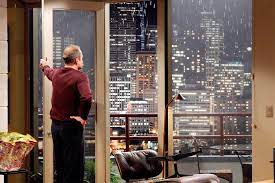

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno to check for the missing data
import missingno as msno
import plotly.express as px
from geopy.geocoders import Nominatim
import time
import folium
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#import the data from a csv-file
df_king_county_imp = pd.read_csv('data/eda.csv')

#### Show the entire dataframe

In [3]:
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', 1000)         # Make the display wide enough
pd.set_option('display.expand_frame_repr', False)  # Avoid line wrapping

df_king_county_imp.head(50)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,3890.000,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,1715.000,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,1060.000,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,1050.000,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,1890.000,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000


#### Get basic information of dataframe

In [5]:
#at first glance there are nan values
#check dataframe size
df_king_county_imp.size

453537

In [161]:
#shape
df_king_county_imp.shape

(21597, 21)

**Buyer information: Jennifer Montgomery Buyer**
**Jennifer Montgomery	Buyer	High budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year**
**Hypotheses:**
1. **If houses are close to the water prices are higher.**
2. **Waterfront houses have higher grades.**
3. **Waterfront houses are mostly outside city areas. (geographical)**

In [6]:
df_king_county_imp.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000
21596,1523300157,2.000,0.750,1020.000,1076.000,2.000,0.000,0.000,3,7,1020.000,0.000,2008,0.000,98144,47.594,-122.299,1020.000,1357.000,2014-10-15,325000.000


In [7]:
df_king_county_imp.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


In [8]:
df_king_county_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [9]:
#the column names are without spaces and with lower case
#check for duplicates - no duplicates
df_king_county_imp.duplicated().value_counts()

False    21597
Name: count, dtype: int64

### Check in which columns are nan values or decimals

In [10]:
# Function to check decimals (ignores NaNs)
def has_decimals(series):
    # Only check numeric columns
    if pd.api.types.is_numeric_dtype(series):
        return ((series % 1 != 0) & ~series.isna()).any()
    else:
        return False

# Build a summary DataFrame
summary = pd.DataFrame({
    'has_decimals': [has_decimals(df_king_county_imp[col]) for col in df_king_county_imp.columns],
    'has_nans': [df_king_county_imp[col].isna().any() for col in df_king_county_imp.columns],
}, index=df_king_county_imp.columns)
summary


,has_decimals,has_nans
id,False,False
bedrooms,False,False
bathrooms,True,False
sqft_living,False,False
sqft_lot,False,False
floors,True,False
waterfront,False,True
view,False,True
condition,False,False
grade,False,False


### Convert the type of data which can be converted into int or datetime

In [4]:
#change date to datetime
df_king_county_imp['date'] = pd.to_datetime(df_king_county_imp['date'])
#leave years as int
#df_king_county_imp['yr_built'] = pd.to_datetime(df_king_county_imp['yr_built'], format='%Y', errors='coerce')
#df_king_county_imp['yr_renovated'] = pd.to_datetime(df_king_county_imp['yr_renovated'])

#change bedroom, sqft_iving and lot to int
df_king_county_imp['bedrooms'] = pd.to_numeric(df_king_county_imp['bedrooms'], downcast='integer')
df_king_county_imp['sqft_living'] = pd.to_numeric(df_king_county_imp['sqft_living'], downcast='integer')
df_king_county_imp['sqft_lot'] = pd.to_numeric(df_king_county_imp['sqft_lot'], downcast='integer')
df_king_county_imp['sqft_above'] = pd.to_numeric(df_king_county_imp['sqft_above'], downcast='integer')
df_king_county_imp['sqft_basement'] = df_king_county_imp['sqft_basement'].astype('Int64')
df_king_county_imp['sqft_living15'] = pd.to_numeric(df_king_county_imp['sqft_living15'], downcast='integer')
df_king_county_imp['sqft_lot15'] = pd.to_numeric(df_king_county_imp['sqft_lot15'], downcast='integer')
df_king_county_imp['price'] = pd.to_numeric(df_king_county_imp['price'], downcast='integer')
#round bathrooms and floors to 2 digits after the comma
df_king_county_imp['bathrooms'] = df_king_county_imp['bathrooms'].round(2)
df_king_county_imp['floors'] = df_king_county_imp['floors'].round(2)

In [12]:
#check date dtype
type(df_king_county_imp['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

##### check again nan values and if they digits after the comma

In [13]:
#check if there are values with digits after the comma in the column
(df_king_county_imp['sqft_living'] % 1 != 0).sum()

np.int64(0)

In [14]:
#check if there are nan values
df_king_county_imp.sqft_living.isna().sum()

np.int64(0)

In [15]:
#check if there are values with digits after the comma in the column
(df_king_county_imp['sqft_lot'] % 1 != 0).sum()

np.int64(0)

In [16]:
#check if there are nan values
df_king_county_imp.sqft_lot.isna().sum()

np.int64(0)

In [17]:
#check if there are values with digits after the comma in the column
(df_king_county_imp['view'] % 1 != 0).sum()

np.int64(63)

##### Comment about bathrooms

In [ ]:
#for bathrooms there are also not full bathrooms. “full,” bathrooms need to have all four of the main fixtures: A toilet, sink, bathtub, and shower. 
#if one is missing it's a 3/4 or with only 2 it's 1/2 and so on


### Get the renovation year correct

In [5]:
#clean up the renovation year as there seems to be a 0 at the end too much and convert it to int and leave nan values
def clean_year(x):
    if pd.isna(x):
        return pd.NA
    x_int = int(x)  # convert float to integer
    # Only fix if year is unrealistically large (e.g., > current year + 100)
    if len(str(x_int)) > 4:
        x_str = str(x_int)
        return int(x_str[:-1])  # drop last digit
    else:
        return x_int

# Apply to the column
df_king_county_imp['yr_renovated'] = df_king_county_imp['yr_renovated'].apply(clean_year).astype('Int64')

In [19]:
df_king_county_imp.head(50)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900
1,6414100192,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014-12-09,538000
2,5631500400,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0,1933,<NA>,98028,47.738,-122.233,2720,8062,2015-02-25,180000
3,2487200875,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000
4,1954400510,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000
5,7237550310,4,4.500,5420,101930,1.000,0.000,0.000,3,11,3890,1530,2001,0,98053,47.656,-122.005,4760,101930,2014-05-12,1230000
6,1321400060,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,<NA>,1995,0,98003,47.310,-122.327,2238,6819,2014-06-27,257500
7,2008000270,3,1.500,1060,9711,1.000,0.000,NaN,3,7,1060,0,1963,0,98198,47.410,-122.315,1650,9711,2015-01-15,291850
8,2414600126,3,1.000,1780,7470,1.000,0.000,0.000,3,7,1050,730,1960,0,98146,47.512,-122.337,1780,8113,2015-04-15,229500
9,3793500160,3,2.500,1890,6560,2.000,0.000,0.000,3,7,1890,0,2003,0,98038,47.368,-122.031,2390,7570,2015-03-12,323000


Export the data to a 'cleaner' file and check the data types

In [6]:
#export the corrected data types and renovation year to a csv-file
df_king_county_imp.to_csv('data/cleaned_total_list.csv',index=False)

In [ ]:
#check datatypes
df_king_county_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  int8          
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int16         
 4   sqft_lot       21597 non-null  int32         
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int16         
 11  sqft_basement  21145 non-null  Int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  Int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

## First check which columns contain nan values and then use missingno to visualize this

In [ ]:
# display number of missing values per column
df_king_county_imp.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

<Axes: >

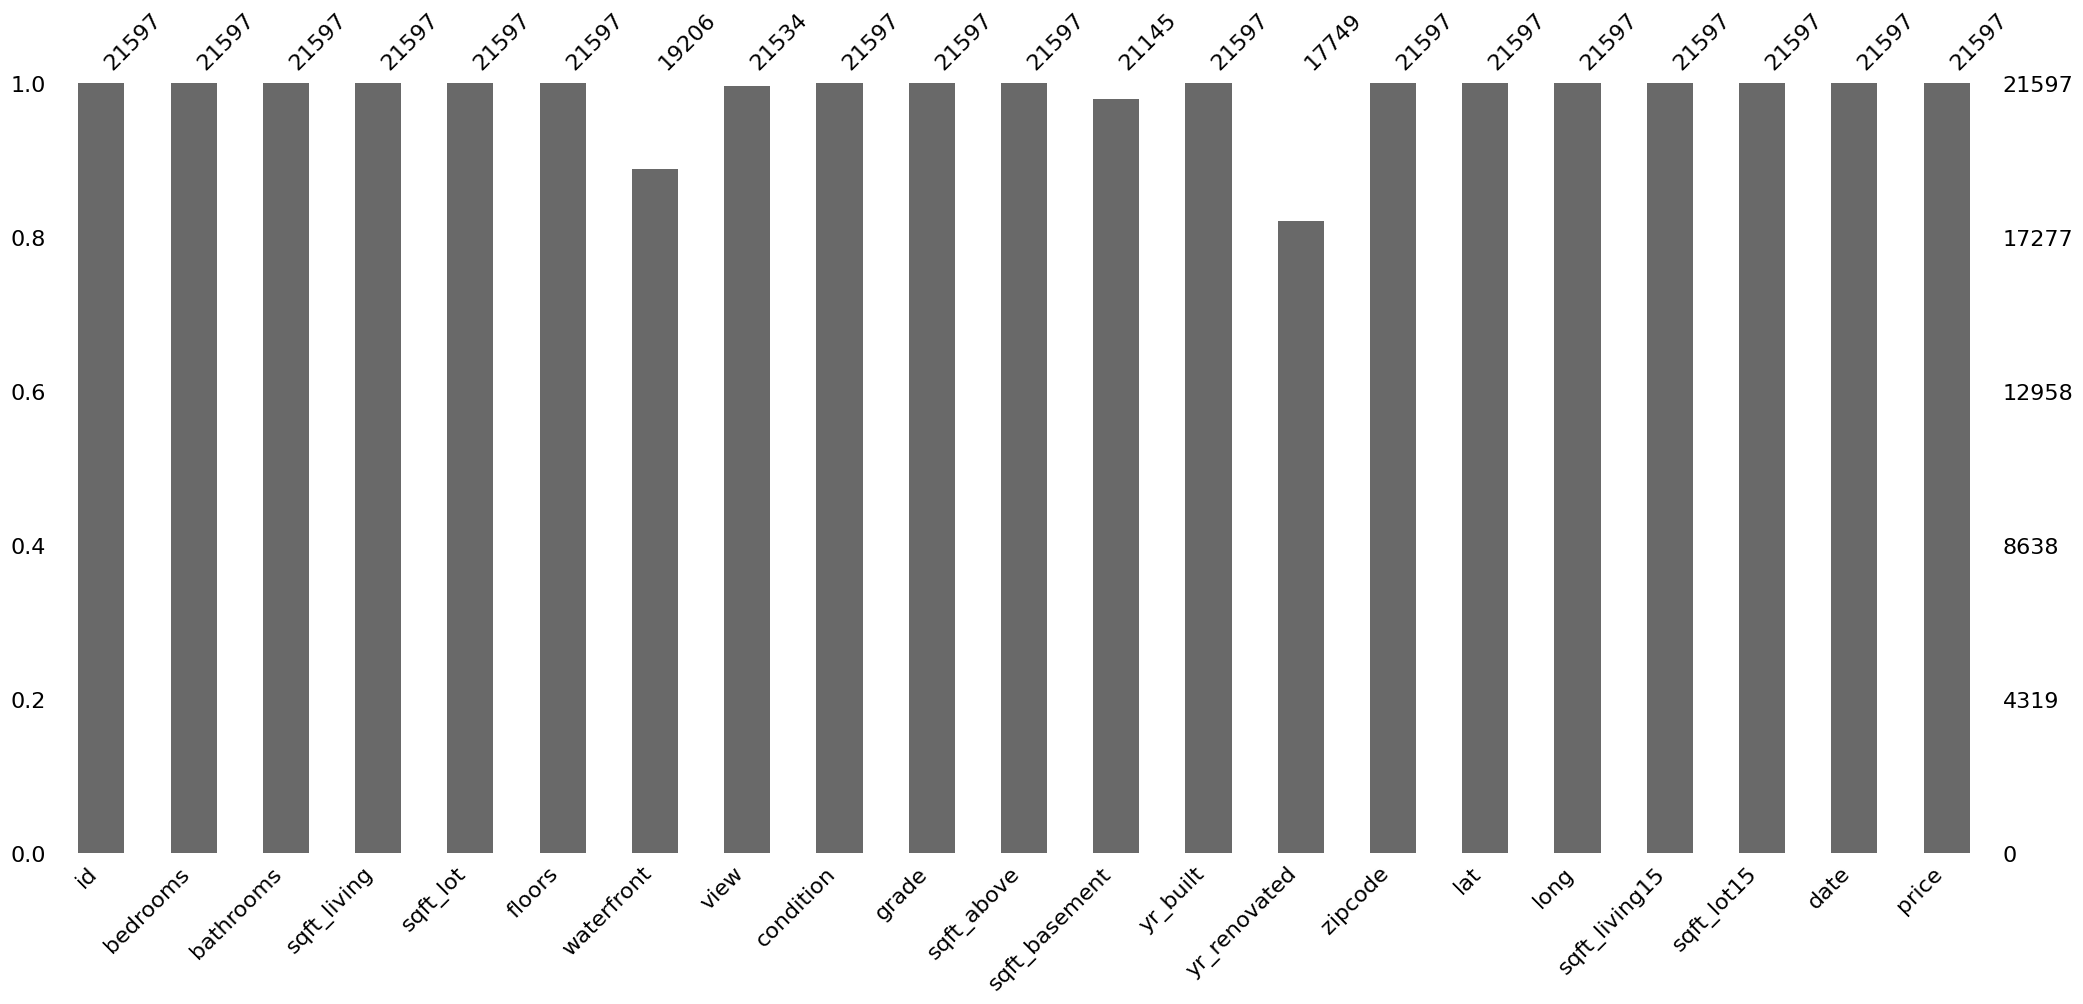

In [22]:
# plotting percentage of missing values per column
msno.bar(df_king_county_imp)

The percentage of data shows that there are 4 columns with missing data: waterfront, view, sqft_basement and yr_renovated. Below we look at how the nan values are distributed.

<Axes: >

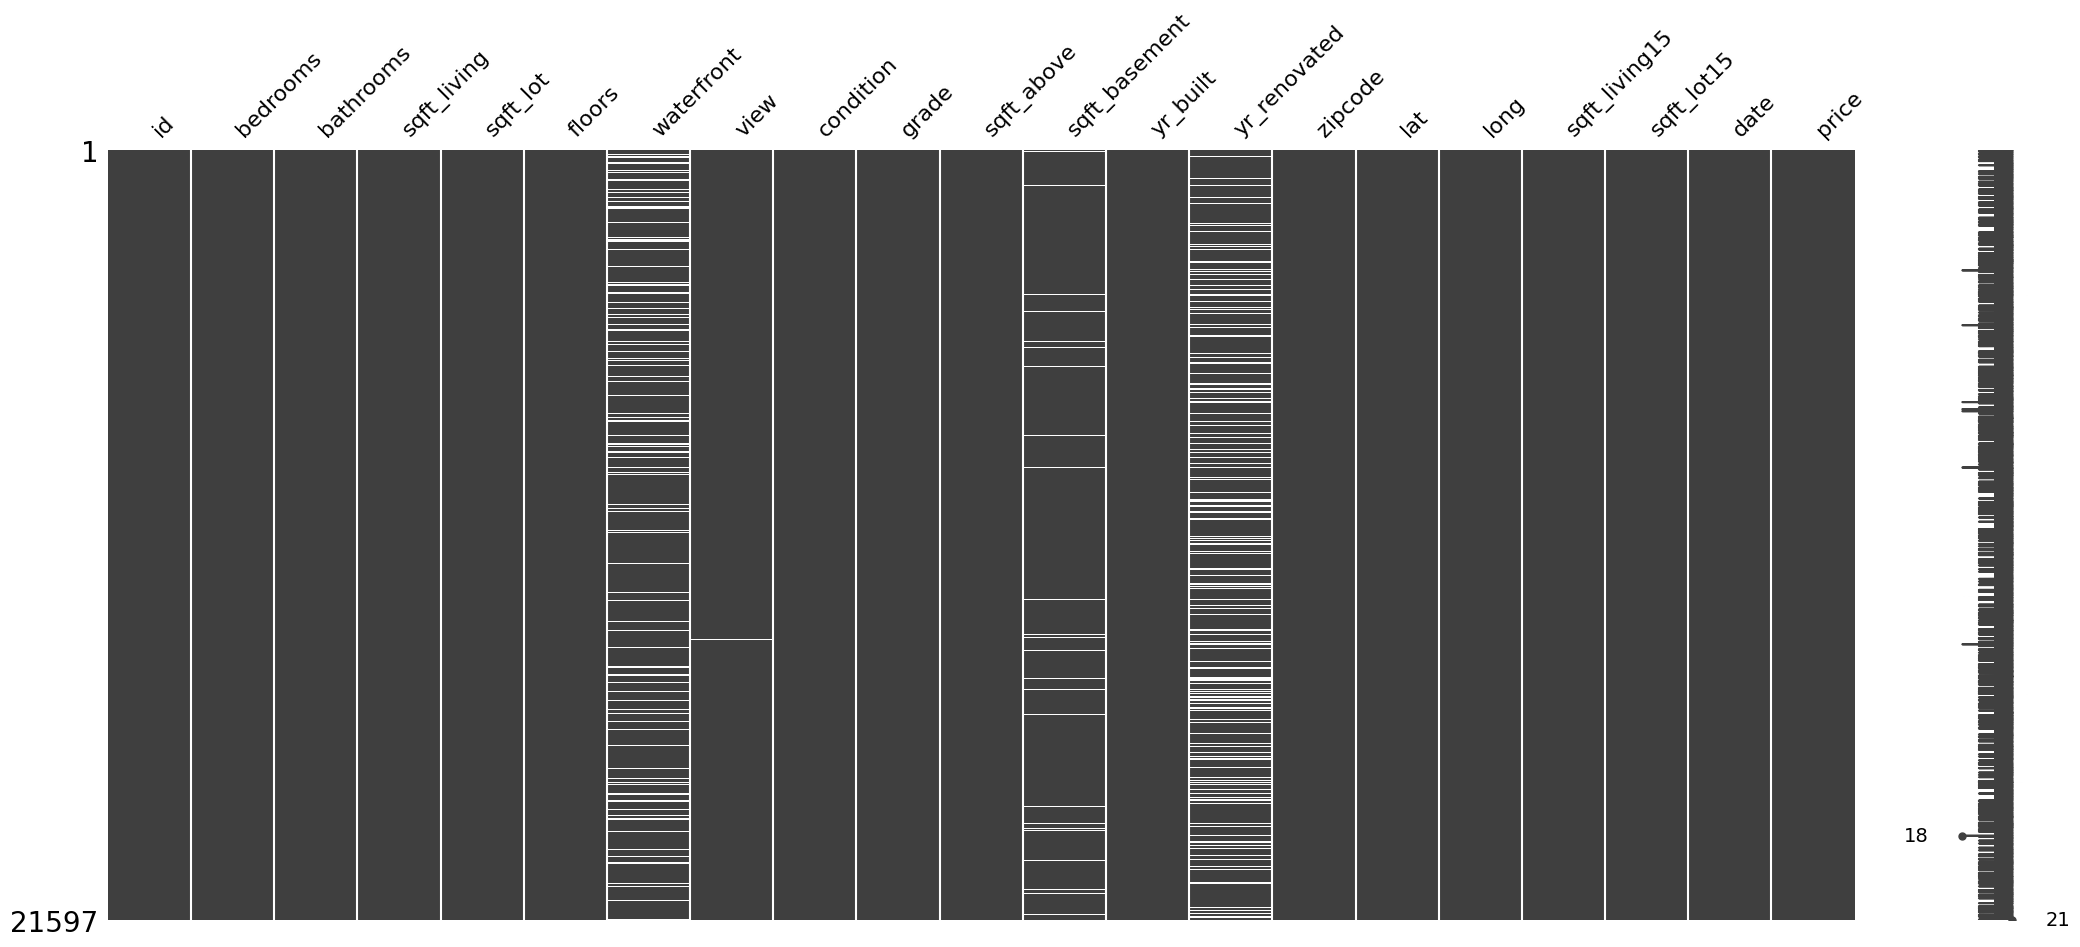

In [ ]:
#show the distribution of nan values
msno.matrix(df_king_county_imp)

Result: There is missing data! Theoretically we could tell the client for the house we are still missing the data and we could inquire if needed (and keep all the values). But since Jennifer Montgomery is explicitly interested in properties with a waterfront and which are renovated we could drop the properties of which we don't know if they are at a waterfront. For the renovation year I would treat the properties with nan values as not renovated. Depending on how many values/properties disappear we continue after. 

### I chose the buyer: Jennifer Montgomery
Jennifer Montgomery - Buyer intentions:	High budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year
Hypotheses:
1. If houses are close to the water prices are higher.
2. Waterfront houses have higher grades.
3. Waterfront houses are mostly outside city areas. (geographical)

## Get the list with nan values

To make life easier we delete all the rows with nan values for the waterfront and yr_renovated, as buyer is only interested in waterfront houses and nan values are unknowns. We would ask the agency to fill nan values as it is important for later usage and to sell and buy houses. Here is the table/dataframe with at least one nan value in it across all columns:

In [26]:
#get the table where at least one nan is included in a row
rows_with_nan = df_king_county_imp[df_king_county_imp.isna().any(axis=1)]
rows_with_nan.head(50)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900
2,5631500400,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0,1933,<NA>,98028,47.738,-122.233,2720,8062,2015-02-25,180000
6,1321400060,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,<NA>,1995,0,98003,47.310,-122.327,2238,6819,2014-06-27,257500
7,2008000270,3,1.500,1060,9711,1.000,0.000,NaN,3,7,1060,0,1963,0,98198,47.410,-122.315,1650,9711,2015-01-15,291850
10,1736800520,3,2.500,3560,9796,1.000,NaN,0.000,3,8,1860,1700,1965,0,98007,47.601,-122.145,2210,8925,2015-04-03,662500
12,114101516,3,1.000,1430,19901,1.500,0.000,0.000,4,7,1430,0,1927,<NA>,98028,47.756,-122.229,1780,12697,2014-05-28,310000
18,16000397,2,1.000,1200,9850,1.000,0.000,0.000,4,7,1200,<NA>,1921,0,98002,47.309,-122.210,1060,5095,2014-12-05,189000
23,8091400200,2,1.500,1070,9643,1.000,NaN,0.000,3,7,1070,0,1985,<NA>,98030,47.353,-122.166,1220,8386,2014-05-16,252700
26,1794500383,3,1.750,2450,2691,2.000,0.000,0.000,3,8,1750,700,1915,<NA>,98119,47.639,-122.360,1760,3573,2014-06-26,937000
28,5101402488,3,1.750,1520,6380,1.000,0.000,0.000,3,7,790,730,1948,<NA>,98115,47.695,-122.304,1520,6235,2014-06-24,438000


## Go through the data to get a general overview and impression

Get some general information about the data

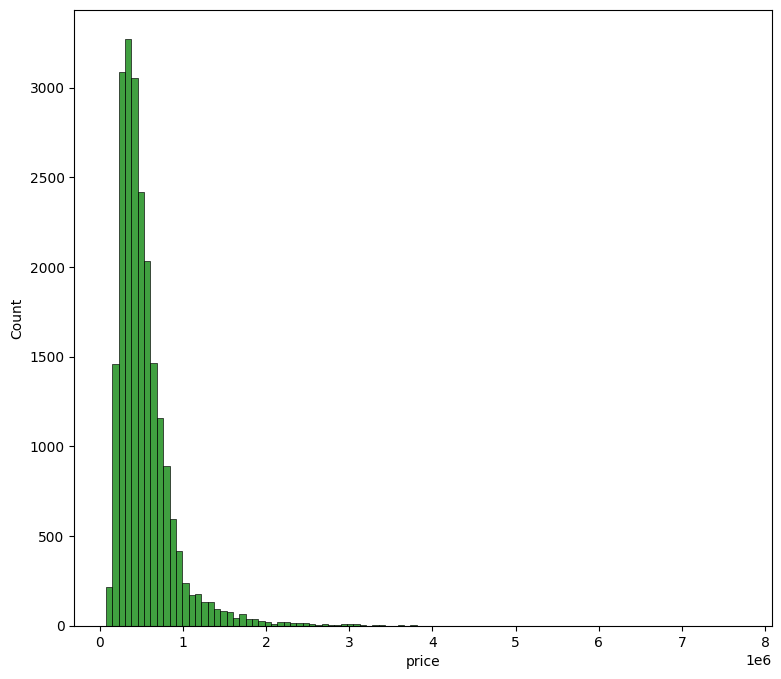

In [ ]:
#check a histogram of sales - slightly skewed to the right
plt.figure(figsize=(9, 8))
sns.histplot(data=df_king_county_imp, x='price', color='g', bins=100, kde=False);

The histogram of the prices is slightly skewed to the right.

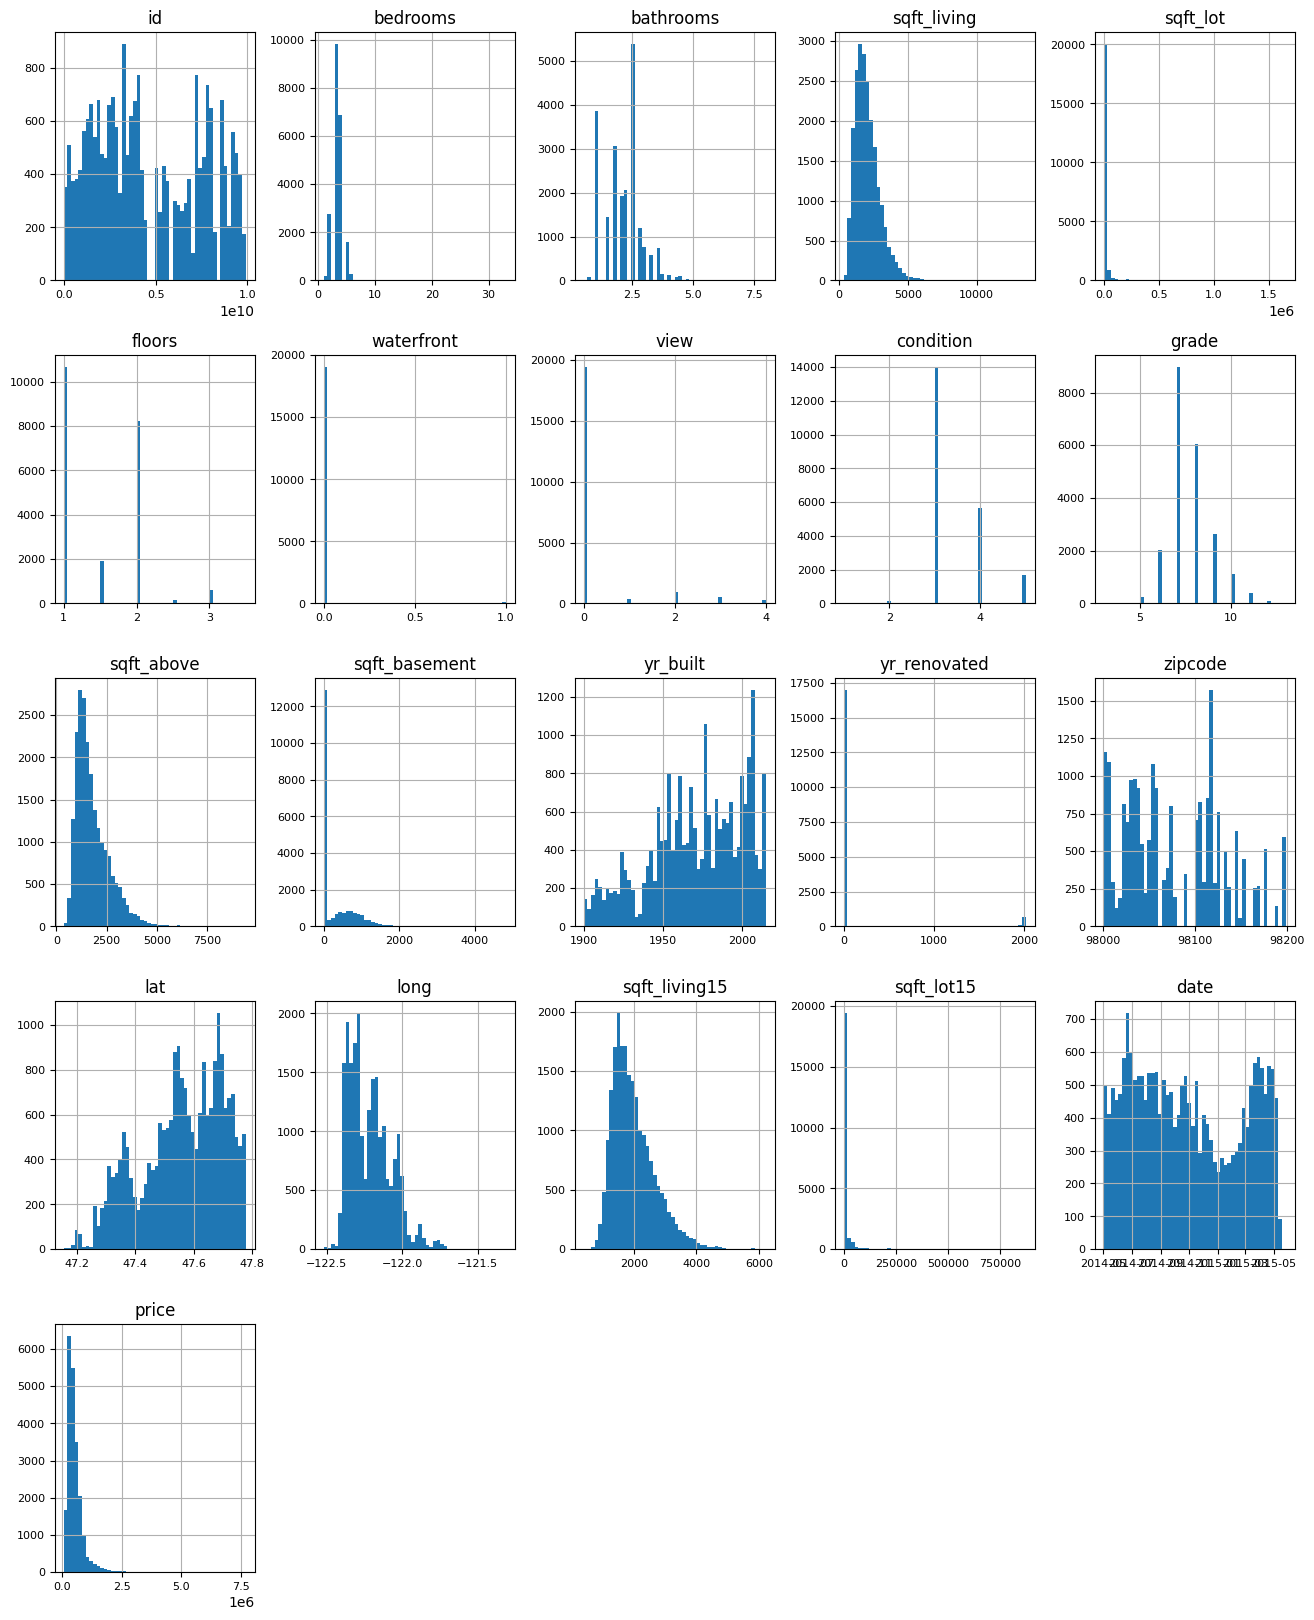

In [152]:
#check histograms of all values
df_king_county_imp.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations
#save the image
plt.gcf().savefig("data/histograms.svg", format='svg', bbox_inches='tight', facecolor='white')

A lot of the histograms are slightly skewed to the right. Other than that not many interesting details for the buyer.

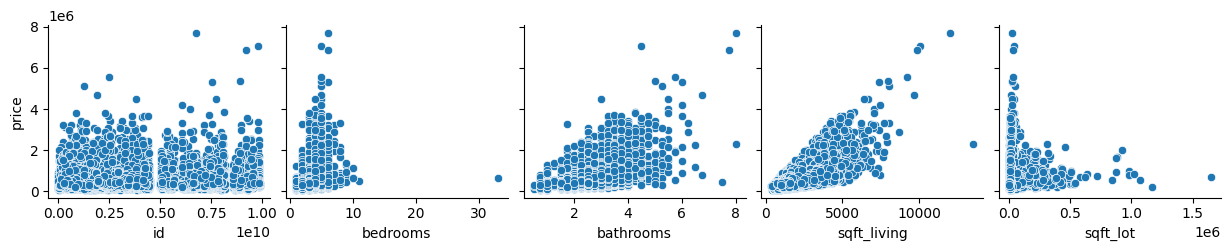

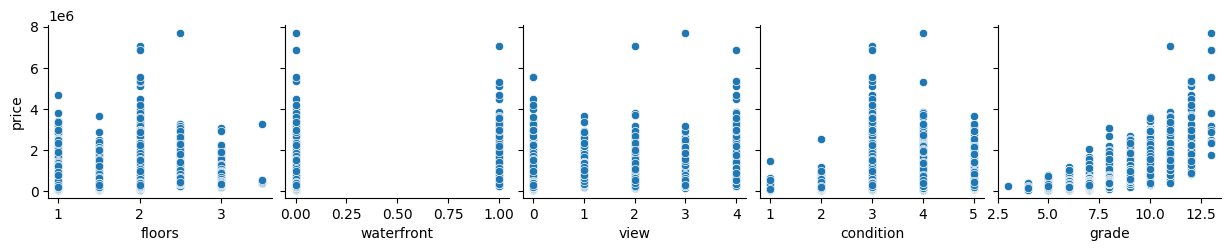

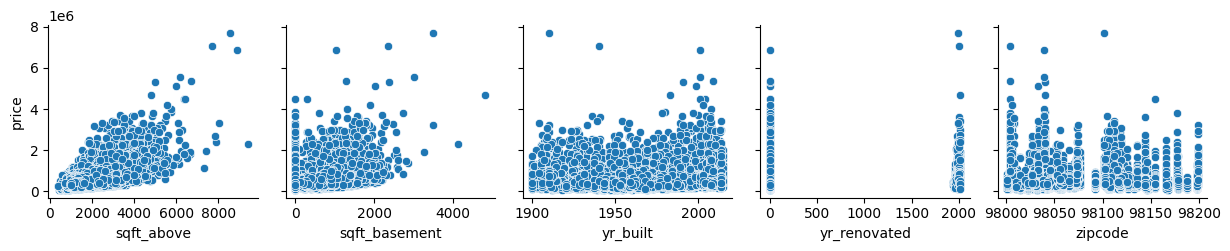

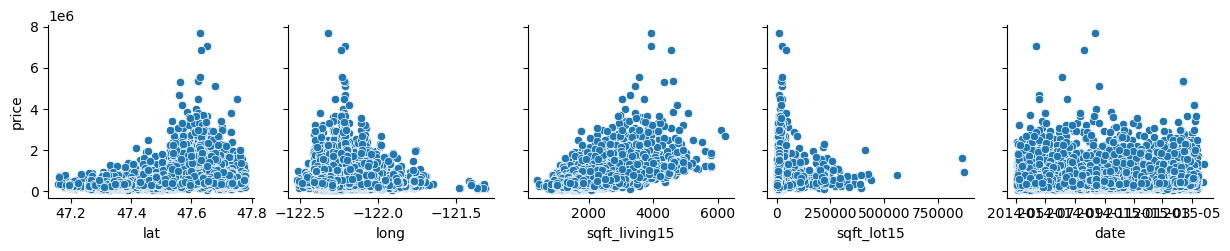

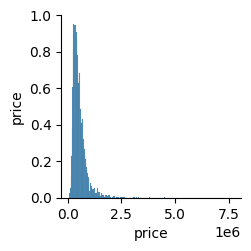

In [ ]:
#check correlations to prices
for i in range(0, len(df_king_county_imp.columns), 5):
    sns.pairplot(data=df_king_county_imp,
                x_vars=df_king_county_imp.columns[i:i+5],
                y_vars=['price'])
    

Not surprisingly the correlations show that the more or higher the features in general (e.g. more bathrooms, more sqft_living etc.) the more expensive the property is.

In [ ]:
#print as pdf
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("data/variables_against_price_all.pdf") as pdf:
    for i in range(0, len(df_king_county_imp.columns), 5):
        cols = df_king_county_imp.columns[i:i+5]
        pair = sns.pairplot(df_king_county_imp, x_vars=cols, y_vars=['price'])
        pdf.savefig(pair.figure, bbox_inches='tight')
        plt.close(pair.figure)

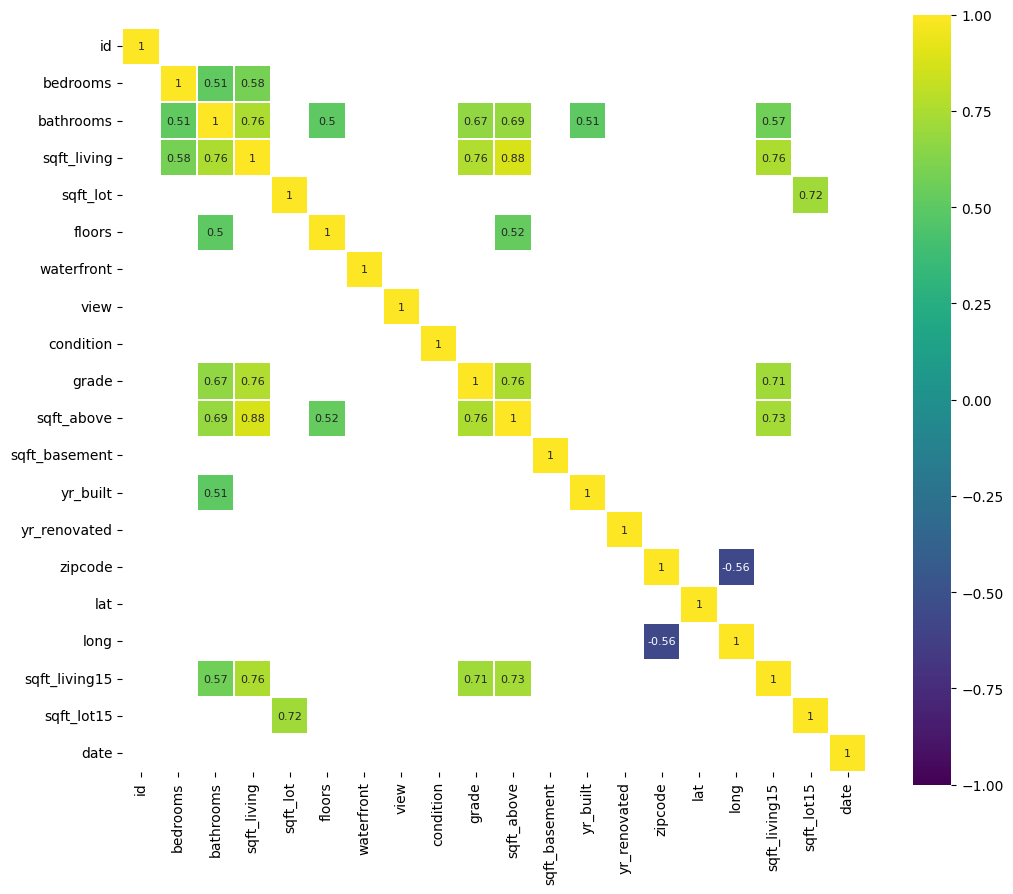

In [156]:
#checkout correlations between the pairs indicated
corr = df_king_county_imp.drop('price', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#save the image
plt.gcf().savefig("data/correlations_heat_map.svg", format='svg', bbox_inches='tight', facecolor='white')

There are no significant correlations that are important to us here. The sqft seems mostly correlated. The interesting variables like waterfront and yr_renovations.

## Reduce the dataframe with dropping nan values in waterfront and yr_renovated

Next we can drop all the houses with nan values in waterfront and in renovated as buyer is only interested in those which are at a waterfront and renovated. With that hopefully the rows with nan values disappear completely. 

In [6]:
#first create a copy of the dataset
df_kc_nonan = df_king_county_imp.copy()

#drop all rows if they contain at least one missing value in the columns waterfront and renovated
df_kc_nonan = df_kc_nonan.dropna(subset=['waterfront','yr_renovated'])
df_kc_nonan.reset_index(inplace=True, drop=True)

In [34]:
df_kc_nonan.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,6414100192,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014-12-09,538000
1,2487200875,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000
2,1954400510,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000
3,7237550310,4,4.500,5420,101930,1.000,0.000,0.000,3,11,3890,1530,2001,0,98053,47.656,-122.005,4760,101930,2014-05-12,1230000
4,1321400060,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,<NA>,1995,0,98003,47.310,-122.327,2238,6819,2014-06-27,257500


In [ ]:
#check missing - nan values
df_kc_nonan.isna().sum()

id                 0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view              47
condition          0
grade              0
sqft_above         0
sqft_basement    334
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
date               0
price              0
dtype: int64

In [36]:
df_kc_nonan.size

331632

<Axes: >

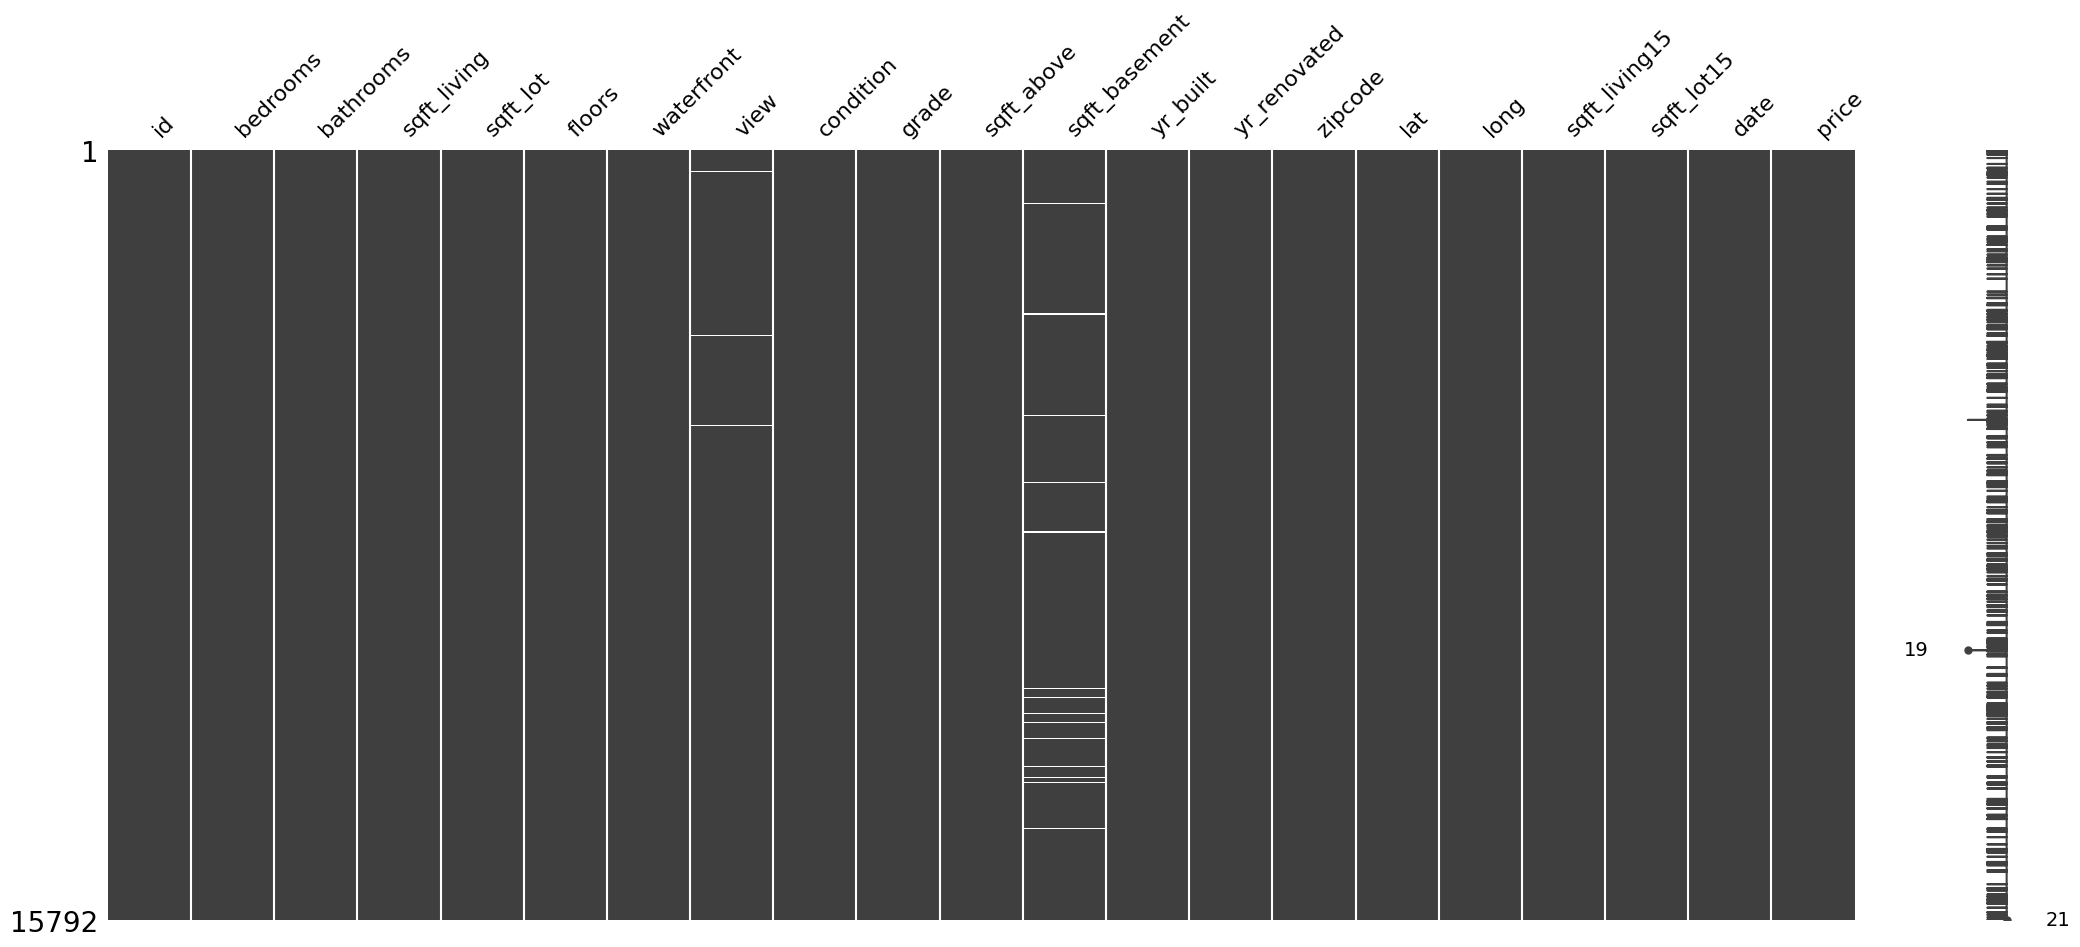

In [ ]:
#get an overview over the nan values with missingno
msno.matrix(df_kc_nonan)

The distribution of nan values is still there in view and sqft_basement after removing the nan values in waterfront and yr_renovated. This is also visible in the graph below showing the overall numbers and percentages of each column. 

<Axes: >

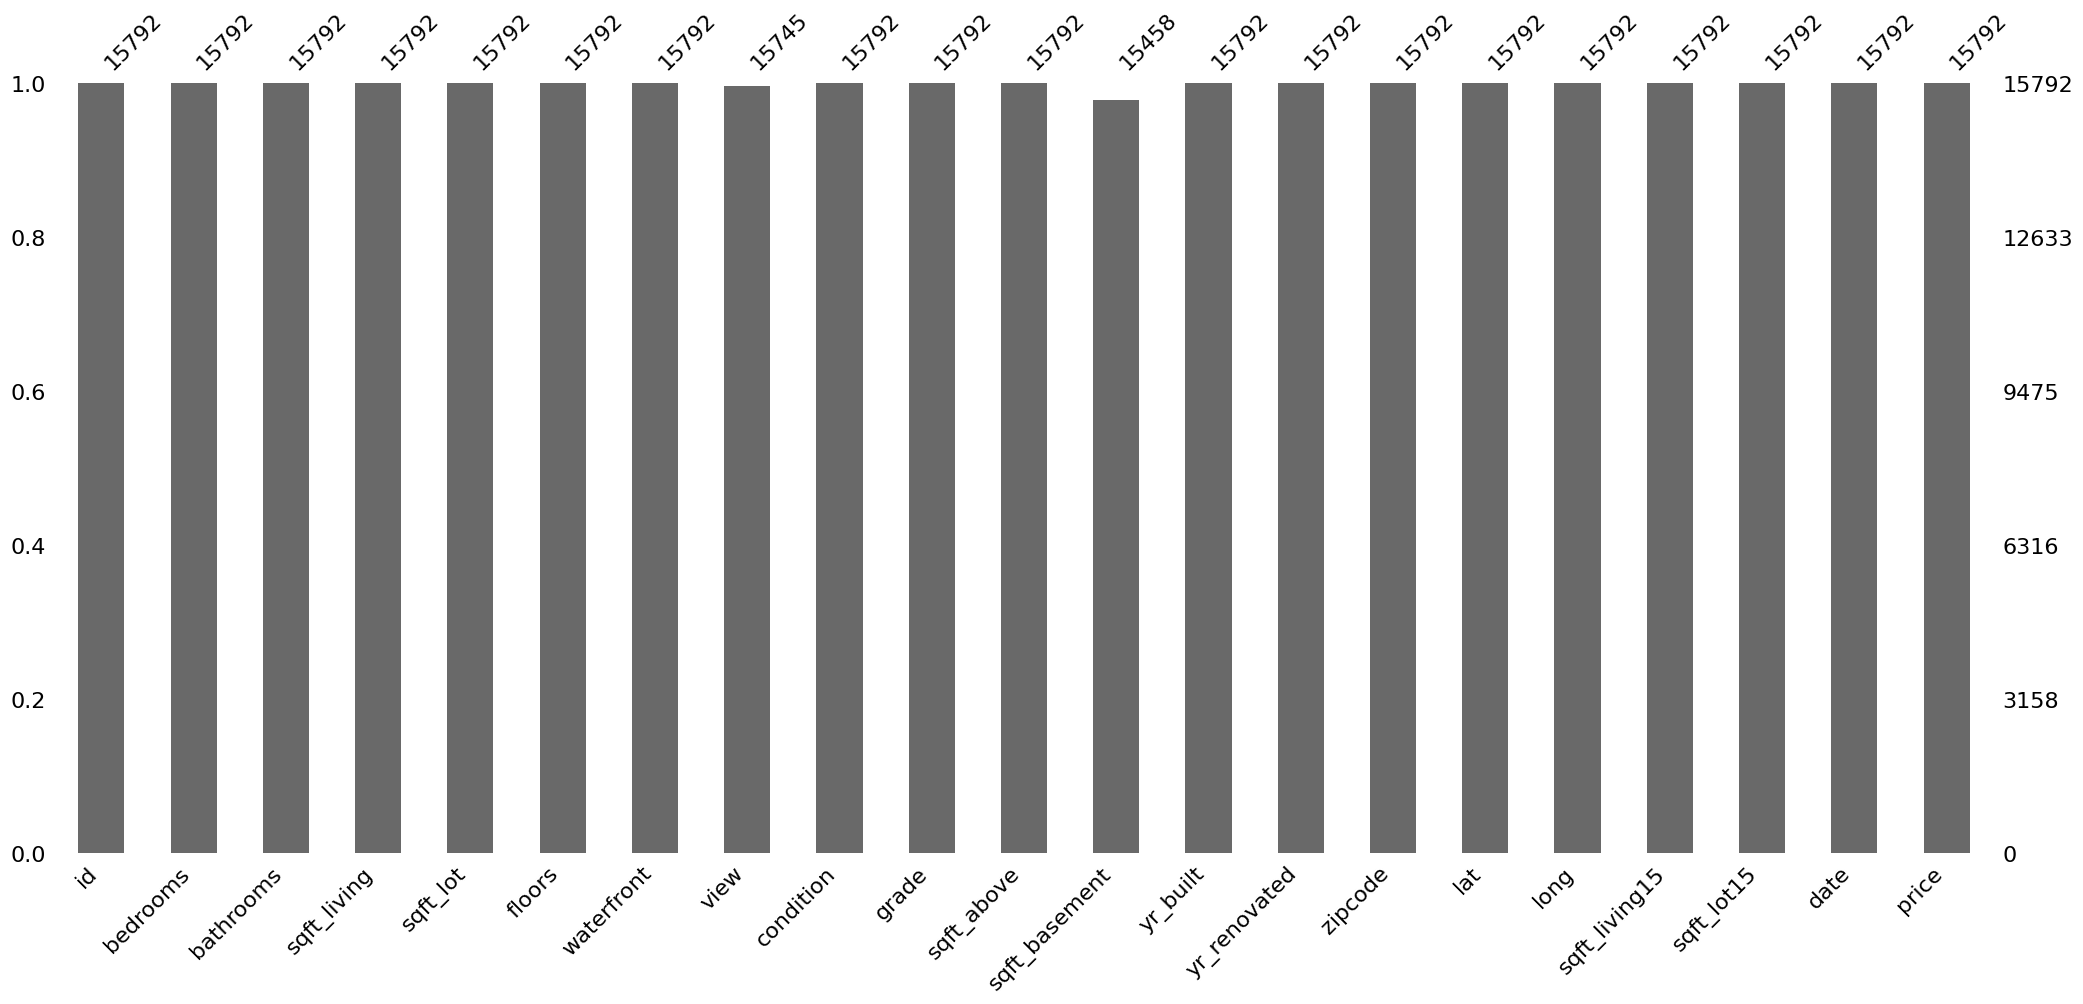

In [38]:
# plotting percentage of missing values per column
msno.bar(df_kc_nonan)

We see that in view and sqft_basement are still nan values. This wouldn't be so important to recommend houses to our buyer. Therefore continue with the slicing and selection of the houses that have a waterfront and are renovated for sure. Otherwise since our buyer wants to show off a good view is welcome and a high sqft_basement as well. We could later omit the nans in there, but not necessary as it is only relevant on the side.

**Remember we figure out house recommendations and don't need to clean up the data for AI!!!**

In [ ]:
#check unique values in waterfront
df_kc_nonan.waterfront.unique()

array([0., 1.])

In [ ]:
#check unique values for renovation date
df_kc_nonan.yr_renovated.unique()

<IntegerArray>
[1991, 0, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984, 1954, 2014, 2011, 1983, 1990, 1988, 1977, 1981, 1995, 2000, 1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 2001, 1980, 1971, 1945, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 2008, 2012, 1968, 1963, 1951, 1962, 1953, 1993, 1955, 1996, 1982, 1956, 1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1965, 1967, 1934, 1972, 1944, 1958, 1974]
Length: 70, dtype: Int64

## Slicing and sorting of data to get a list to recommend to buyer

In [7]:
#slicing of houses with waterfront and renovation
df_first_selection = df_kc_nonan[(df_kc_nonan.waterfront ==1) & (df_kc_nonan.yr_renovated != 0)]
df_first_selection

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
174,8096000060,2,1.750,1450,15798,2.000,1.000,4.000,3,7,...,220,1915,1978,98166,47.450,-122.375,2030,13193,2015-04-13,655000
942,7636800041,3,4.500,4380,47044,2.000,1.000,3.000,3,9,...,660,1968,1990,98166,47.473,-122.365,2460,18512,2014-06-25,995000
1435,1922039062,2,1.500,1008,26487,1.000,1.000,4.000,4,6,...,0,1943,2002,98070,47.385,-122.479,1132,24079,2015-04-20,480000
2100,4114601570,3,3.250,5020,12431,2.000,1.000,4.000,3,10,...,1600,1941,2002,98144,47.593,-122.287,3680,12620,2014-11-18,3600000
2374,3343301910,5,4.500,2120,8944,2.000,1.000,4.000,5,8,...,0,1939,1963,98006,47.549,-122.197,2870,8944,2014-10-20,1000000
2843,9808700762,5,4.500,10040,37325,2.000,1.000,2.000,3,11,...,2360,1940,2001,98004,47.650,-122.214,3930,25449,2014-06-11,7060000
2855,1269200229,3,3.250,3786,38038,1.000,1.000,4.000,3,9,...,1852,1978,2006,98070,47.391,-122.448,2850,33361,2014-07-23,1380000
3176,4166600115,3,2.750,3230,75889,2.000,1.000,4.000,3,7,...,<NA>,1925,1993,98023,47.334,-122.370,2560,72229,2014-11-21,1150000
3473,9201300050,5,2.250,2800,8442,2.000,1.000,4.000,3,9,...,0,1963,2001,98075,47.578,-122.076,3220,9156,2014-08-14,1850000
4201,623059016,4,3.250,3190,11774,2.000,1.000,4.000,3,8,...,580,1956,1991,98178,47.503,-122.225,2240,8725,2014-07-17,1100000


In [ ]:
#determine the dimensions of the remaining list of properties
df_first_selection.shape

(29, 21)

In [48]:
#check missing nan values
df_first_selection.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    2
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

We have narrowed the list down to 29 objects that suite our buyer. Now let's check her criteria again: High budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year.
Well let's sort according to high grades and the years renovated. As budget is not important, the prices don't matter that much and I would pick first the houses with the highest grades and most recent renovations.

In [8]:
#sort the values according to year renovated and grade
df_first_selection_sort = df_first_selection.sort_values(by=['grade', 'yr_renovated'], ascending=False)
df_first_selection_sort 

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
5903,1924059029,5,6.750,9640,13068,1.000,1.000,4.000,3,12,...,4820,1983,2009,98040,47.557,-122.210,3270,10454,2014-06-17,4670000
11490,6117502230,3,3.500,4660,21164,2.000,1.000,4.000,3,12,...,0,1975,1990,98166,47.442,-122.354,3140,24274,2014-12-01,1640000
2843,9808700762,5,4.500,10040,37325,2.000,1.000,2.000,3,11,...,2360,1940,2001,98004,47.650,-122.214,3930,25449,2014-06-11,7060000
13333,3625059152,3,3.250,4220,41300,1.000,1.000,4.000,4,11,...,1760,1958,1987,98008,47.608,-122.110,3810,30401,2014-12-30,3300000
2100,4114601570,3,3.250,5020,12431,2.000,1.000,4.000,3,10,...,1600,1941,2002,98144,47.593,-122.287,3680,12620,2014-11-18,3600000
6412,3343302110,3,3.000,2790,13295,2.000,1.000,4.000,4,10,...,420,1933,1989,98006,47.547,-122.197,3140,11949,2015-03-06,1800000
2855,1269200229,3,3.250,3786,38038,1.000,1.000,4.000,3,9,...,1852,1978,2006,98070,47.391,-122.448,2850,33361,2014-07-23,1380000
3473,9201300050,5,2.250,2800,8442,2.000,1.000,4.000,3,9,...,0,1963,2001,98075,47.578,-122.076,3220,9156,2014-08-14,1850000
12935,3222049151,3,2.500,2990,10711,1.000,1.000,4.000,3,9,...,1430,1976,1991,98198,47.357,-122.324,2870,11476,2014-10-30,820000
942,7636800041,3,4.500,4380,47044,2.000,1.000,3.000,3,9,...,660,1968,1990,98166,47.473,-122.365,2460,18512,2014-06-25,995000


Remark: 0 for the basement seems to mean that no basement exists. 

## Determine the location of coordinates or/and zip codes

Now determine location of houses (more commented version down below at 3.):

In [75]:
# use code to get the city and address from Nomatim 
# Initialize geolocator
geolocator = Nominatim(user_agent="geo_checker")

# Cache to avoid repeated queries
cache = {}

def get_city_and_address(lat, lon, zip_code=None):
    key = (lat, lon)
    if key in cache:
        return cache[key]

    try:
        # Reverse geocode using lat/lon
        location = geolocator.reverse((lat, lon), exactly_one=True)
        address_dict = location.raw.get('address', {})
        city = address_dict.get('city') or address_dict.get('town') or \
               address_dict.get('village') or address_dict.get('municipality')
        full_address = location.address

        # Fallback using ZIP if city not found
        if not city and zip_code:
            location_zip = geolocator.geocode(zip_code, exactly_one=True)
            if location_zip:
                address_zip = location_zip.raw.get('address', {})
                city = address_zip.get('city') or address_zip.get('town') or \
                       address_zip.get('village') or address_zip.get('municipality')
                full_address = location_zip.address

        if not city:
            city = "Outside City"
            full_address = full_address or "Unknown Address"

    except:
        city = "Error"
        full_address = "Error"

    # Save result to cache
    cache[key] = (city, full_address)
    time.sleep(1)  # respect Nominatim rate limit
    return city, full_address

# Apply row-wise and create new columns
df_first_selection_sort[['city', 'full_address']] = df_first_selection_sort.apply(
    lambda row: pd.Series(get_city_and_address(row['lat'], row['long'], row.get('zipcode'))),
    axis=1
)


In [76]:
df_first_selection_sort

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,city,full_address,only_city,location_type
5903,1924059029,5,6.750,9640,13068,1.000,1.000,4.000,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454,2014-06-17,4670000,Mercer Island,"5044, Butterworth Road, Mercer Island, King County, Washington, 98040, United States",Outside City,Outside City
11490,6117502230,3,3.500,4660,21164,2.000,1.000,4.000,3,12,4660,0,1975,1990,98166,47.442,-122.354,3140,24274,2014-12-01,1640000,Normandy Park,"17845, Normandy Terrace Southwest, Normandy Park, King County, Washington, 98166, United States",Outside City,Outside City
2843,9808700762,5,4.500,10040,37325,2.000,1.000,2.000,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449,2014-06-11,7060000,Yarrow Point,"4604, 95th Avenue Northeast, Yarrow Point, King County, Washington, 98004, United States",Outside City,Outside City
13333,3625059152,3,3.250,4220,41300,1.000,1.000,4.000,4,11,2460,1760,1958,1987,98008,47.608,-122.110,3810,30401,2014-12-30,3300000,Bellevue,"138, West Lake Sammamish Parkway Southeast, Lake Hills, Bellevue, King County, Washington, 98008, United States",Bellevue,City
2100,4114601570,3,3.250,5020,12431,2.000,1.000,4.000,3,10,3420,1600,1941,2002,98144,47.593,-122.287,3680,12620,2014-11-18,3600000,Seattle,"1134, Lakeside Avenue South, Leschi, Seattle, King County, Washington, 98144, United States",Seattle,City
6412,3343302110,3,3.000,2790,13295,2.000,1.000,4.000,4,10,2370,420,1933,1989,98006,47.547,-122.197,3140,11949,2015-03-06,1800000,Bellevue,"6224, Hazelwood Lane Southeast, Newport Shores, Hazelwood, Bellevue, King County, Washington, 98006, United States",Bellevue,City
2855,1269200229,3,3.250,3786,38038,1.000,1.000,4.000,3,9,1934,1852,1978,2006,98070,47.391,-122.448,2850,33361,2014-07-23,1380000,Outside City,"98070, Sant'Agata di Militello, Messina, Sicilia, Italia",Outside City,Outside City
3473,9201300050,5,2.250,2800,8442,2.000,1.000,4.000,3,9,2800,0,1963,2001,98075,47.578,-122.076,3220,9156,2014-08-14,1850000,Sammamish,"3429, East Lake Sammamish Shore Lane Southeast, Sammamish, King County, Washington, 98075, United States",Outside City,Outside City
12935,3222049151,3,2.500,2990,10711,1.000,1.000,4.000,3,9,1560,1430,1976,1991,98198,47.357,-122.324,2870,11476,2014-10-30,820000,Des Moines,"27229, 8th Avenue South, Redondo, Des Moines, King County, Washington, 98198, United States",Outside City,Outside City
942,7636800041,3,4.500,4380,47044,2.000,1.000,3.000,3,9,3720,660,1968,1990,98166,47.473,-122.365,2460,18512,2014-06-25,995000,Burien,"14423, 25th Avenue Southwest, Seahurst, Burien, King County, Washington, 98166, United States",Outside City,Outside City


In [61]:
#get only the address column
pd.set_option('display.max_colwidth', None)  # or use -1 in older pandas versions
df_first_selection_sort[['city','full_address']]

,city,full_address
5903,Mercer Island,"5044, Butterworth Road, Mercer Island, King County, Washington, 98040, United States"
11490,Normandy Park,"17845, Normandy Terrace Southwest, Normandy Park, King County, Washington, 98166, United States"
2843,Yarrow Point,"4604, 95th Avenue Northeast, Yarrow Point, King County, Washington, 98004, United States"
13333,Bellevue,"138, West Lake Sammamish Parkway Southeast, Lake Hills, Bellevue, King County, Washington, 98008, United States"
2100,Seattle,"1134, Lakeside Avenue South, Leschi, Seattle, King County, Washington, 98144, United States"
6412,Bellevue,"6224, Hazelwood Lane Southeast, Newport Shores, Hazelwood, Bellevue, King County, Washington, 98006, United States"
2855,Outside City,"Southwest Bayview Drive, King County, Washington, 98070, United States"
3473,Sammamish,"3429, East Lake Sammamish Shore Lane Southeast, Sammamish, King County, Washington, 98075, United States"
12935,Des Moines,"27229, 8th Avenue South, Redondo, Des Moines, King County, Washington, 98198, United States"
942,Burien,"14423, 25th Avenue Southwest, Seahurst, Burien, King County, Washington, 98166, United States"


In [74]:
#export the data to a csv-file
df_first_selection_sort.to_csv('data/offerlist.csv',index=False)

### Display the locations on a map

In [ ]:
#display the locations on a map
import folium

# Create a map centered roughly at the average location
map_center = [df_first_selection_sort['lat'].mean(), df_first_selection_sort['long'].mean()]
m = folium.Map(location=map_center, zoom_start=2)

# Add markers for each location
for _, row in df_first_selection_sort.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['city']  # popup shows the city name
    ).add_to(m)

# Save the map 
m.save('data/locations_map.html')


# Address the hypothesis we set

Address the hypotheses:
Hypotheses:
1. **If houses are close to the water prices are higher.**
2. Waterfront houses have higher grades.
3. Waterfront houses are mostly outside city areas. (geographical)

### Plotly plot

In [10]:
#1 produce box plot of houses at waterfront and not and the prices
#ceate copy of df_kc_nonan for plotting
df_kc_nonan_cp = df_kc_nonan.copy()
#change label of waterfront
df_kc_nonan_cp['waterfront'] = df_kc_nonan_cp['waterfront'].map({0: 'Other', 1: 'Waterfront'})
#use plotly, for that use the dataframe without nan values in waterfront and yr_renovated
fig = px.box(df_kc_nonan_cp, x='waterfront', y='price', points='all', 
             labels={
                     "waterfront": "At the Waterfront",
                     "price": "Price of houses"
                 },
                title="Comparison of prices of houses of waterfront or away from waterfront")

fig.show()

Shows that on average the price at waterfront properties is higher and that there are less waterfront properties than others.

### Seaborn plot

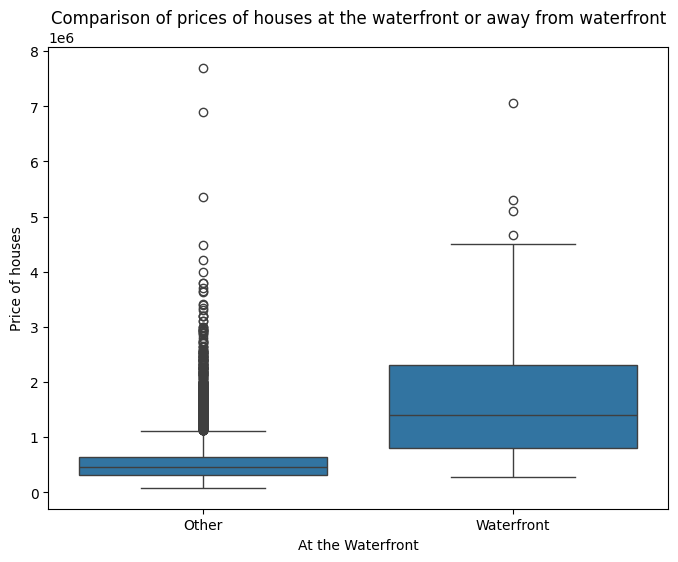

In [ ]:
#produce the plot with seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_kc_nonan_cp, x='waterfront', y='price', showfliers=True)

# Customize labels and title
plt.xlabel("At the Waterfront")
plt.ylabel("Price of houses")
plt.title("Comparison of prices of houses at the waterfront or away from waterfront")

plt.show()

Shows that on average the price at waterfront properties is higher.

Add a mean indicator

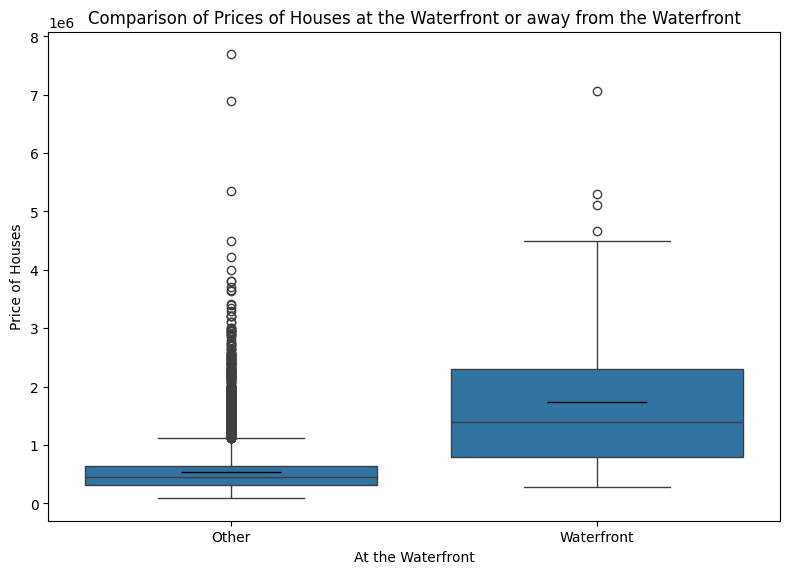

In [133]:
#boxplot with also an indicator for the mean value with seaborn
fig = plt.figure(figsize=(8, 6))

# Boxplot with mean displayed
sns.boxplot(
    data=df_kc_nonan_cp,
    x='waterfront',
    y='price',
    #palette='Set2',
    showfliers=True,  # hide extreme outliers (optional)
    showmeans=True,
    meanprops={
        "marker": "_",            # diamond shape for mean
        "markerfacecolor": "red", # red fill
        "markeredgecolor": "black",
        "markersize": 72
    }
)



# Labels and title
plt.xlabel("At the Waterfront")
plt.ylabel("Price of Houses")
plt.title("Comparison of Prices of Houses at the Waterfront or away from the Waterfront")

plt.tight_layout()
plt.show()


Shows that on average the price at waterfront properties is higher. Extra black bar in the boxplot (the one that doesn't go all the way through the box) is the mean of the data.

In [112]:
#save the image
fig.savefig("data/Comparison_waterfront_prices.svg", format='svg', bbox_inches='tight', facecolor='white')

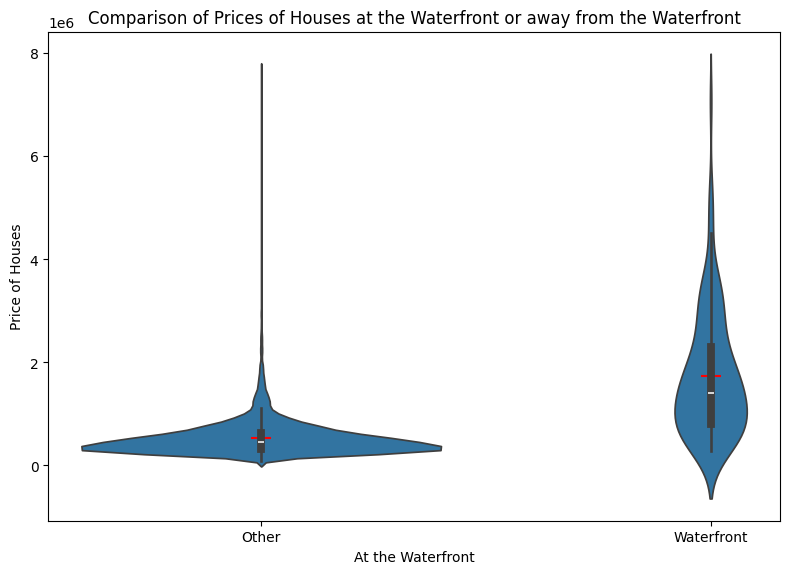

In [ ]:
#alternative violin plot with seaborn
#boxplot with also an indicator for the mean value with seaborn
fig_1viol = plt.figure(figsize=(8, 6))

# Boxplot with mean displayed
sns.violinplot(
    data=df_kc_nonan_cp,
    x='waterfront',
    y='price'
)

# Overlay mean value
means = df_kc_nonan_cp.groupby('waterfront')['price'].mean().reset_index()
plt.scatter(
    x=means['waterfront'], 
    y=means['price'], 
    color='red', 
    marker='_',         # same as your previous mean marker
    s=200               # marker size
)

# Labels and title
plt.xlabel("At the Waterfront")
plt.ylabel("Price of Houses")
plt.title("Comparison of Prices of Houses at the Waterfront or away from the Waterfront")

plt.tight_layout()
plt.show()

Shows that on average the price at waterfront properties is higher and that there is a really high amount of properties in the lower price range visible from the distribution. Red line shows mean value.

In [ ]:
#save the image, red bar shows mean value
fig_1viol.savefig("data/Comparison_waterfront_prices_viol.svg", format='svg', bbox_inches='tight', facecolor='white')

1. **If houses are close to the water prices are higher.**
Answer: As we can see from the box plots above on average prices at the waterfront are higher. The seperate bar shows the mean value.

#### Extra plot with another indicator for mean

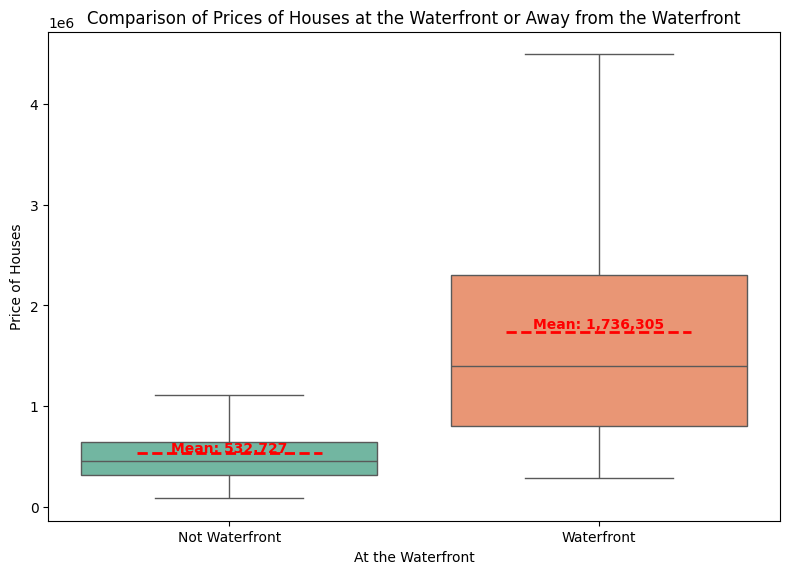

In [ ]:
#extra plot with another indicator of mean values (here not important)

plt.figure(figsize=(8, 6))

# Boxplot (no mean markers — we’ll add lines manually)
sns.boxplot(
    data=df_kc_nonan_cp,
    x='waterfront',
    y='price',
    palette='Set2',
    showmeans=False,
    showfliers=False
)

# Compute mean per category
means = df_kc_nonan_cp.groupby('waterfront')['price'].mean()

# Add mean lines and annotations
ax = plt.gca()  # get current axes
for i, (category, mean_val) in enumerate(means.items()):
    # Draw mean line across box
    ax.hlines(
        mean_val,                      # y-position
        i - 0.25, i + 0.25,            # span of line (adjust width)
        colors='red', linewidth=2, linestyles='--', label='Mean' if i == 0 else ""
    )
    
    # Annotate mean value
    ax.text(
        i, mean_val + (0.02 * mean_val),  # position slightly above line
        f"Mean: {mean_val:,.0f}",         # formatted text (e.g. 520,000)
        ha='center', color='red', fontsize=10, fontweight='bold'
    )

# Labels and title
plt.xlabel("At the Waterfront")
plt.ylabel("Price of Houses")
plt.title("Comparison of Prices of Houses at the Waterfront or Away from the Waterfront")

# Optional: map numeric categories to readable labels
ax.set_xticklabels(['Not Waterfront', 'Waterfront'])

# Add legend for mean line
handles, labels = ax.get_legend_handles_labels()
if 'Mean' not in labels:
    ax.legend(['Mean'], loc='upper right')

plt.tight_layout()
plt.show()


Shows that on average the price at waterfront properties is higher. Mean is also indicated with number in it.

In [ ]:
#calculation of mean value for waterfront houses
df_kc_nonan.price[df_kc_nonan.waterfront == 1].mean()

np.float64(1736304.958677686)

In [ ]:
#calculation of mean value for non waterfront houses
df_kc_nonan.price[df_kc_nonan.waterfront == 0].mean()

np.float64(532727.2463148491)

### 2. Waterfront houses have higher grades.
Solution: essentially produce the same plot, but instead of looking at prices use grades.

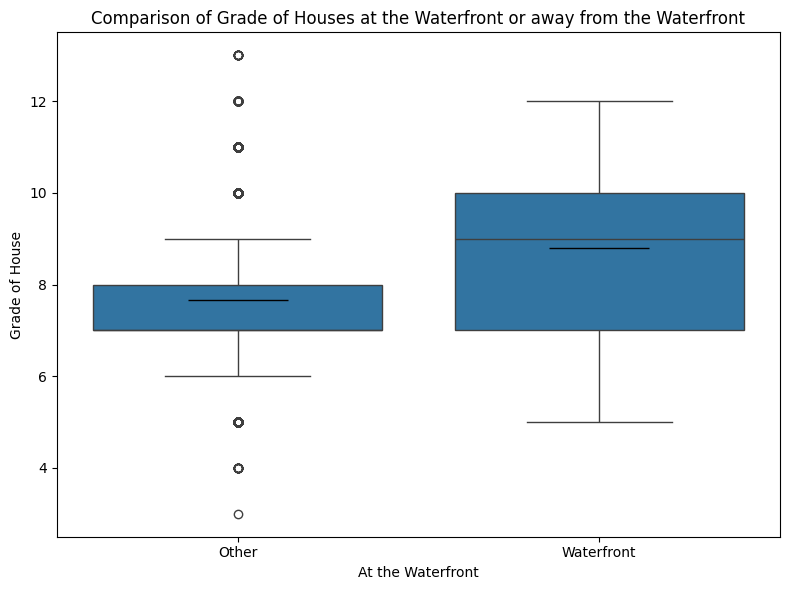

In [11]:
fig_grade = plt.figure(figsize=(8, 6))

# Boxplot with mean displayed
sns.boxplot(
    data=df_kc_nonan_cp,
    x='waterfront',
    y='grade',
    #palette='Set2',
    showfliers=True,  # hide extreme outliers (optional)
    showmeans=True,
    meanprops={
        "marker": "_",            # diamond shape for mean
        "markerfacecolor": "red", # red fill
        "markeredgecolor": "black",
        "markersize": 72
    }
)



# Labels and title
plt.xlabel("At the Waterfront")
plt.ylabel("Grade of House")
plt.title("Comparison of Grade of Houses at the Waterfront or away from the Waterfront")

plt.tight_layout()
plt.show()

In [ ]:
#check why the median line is not visible in other
df_kc_nonan_cp.groupby('waterfront')['grade'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
Other,15671.000,7.657,1.162,3.000,7.000,7.000,8.000,13.000
Waterfront,121.000,8.802,1.787,5.000,7.000,9.000,10.000,12.000


On average waterfront properties have a higher grade than others. Smaller black bar is the mean value. Interesting sliqhtly lower than median for waterfront houses. In the other box the median is equal to the 25% quartile line. That's why it is not visible as an extra line.

In [114]:
#save the image
fig_grade.savefig("data/Comparison_waterfront_grades.svg", format='svg', bbox_inches='tight', facecolor='white')

### 3. Waterfront houses are mostly outside city areas. (geographical)

Refine our location determination. Add a city label column and improve the selection to improve location and address determinatino and to remove Sicily, Italy.

This code does the following:
1. Takes lat/lon coordinates (and optionally ZIP code) from a DataFrame.
2. Checks if coordinates are in King County bounds.
3. Uses Nominatim reverse geocoding to get a human-readable address.
4. Extracts city, full_address, and only_city.
5. Falls back to "Outside City" for coordinates outside bounds or if geocoding fails.
6. Uses caching to avoid redundant API calls.
7. Adds results to the DataFrame as new columns.

In [14]:
#alternative: check additionally if the city is really a city (and not a town or village etc.)

#geolocator is a Nominatim object from the geopy library. Nominatim is a service that converts coordinates into human-readable addresses (reverse geocoding) and vice versa.
#cache is an empty dictionary to store results of previous lookups so repeated calls for the same coordinates don’t hit the Nominatim API (saves time and avoids rate-limits).
geolocator = Nominatim(user_agent="geo_checker")
cache = {}

# Define allowed bounding box for King County + small margin (to catch nearby cities)
#Later, coordinates outside this box are automatically labeled as “Outside City.”
MIN_LAT, MAX_LAT = 47.0, 48.2
MIN_LON, MAX_LON = -123.0, -121.5

#This is the core function. Its job is to return three pieces of location info for given coordinates:
#city → a generalized city/town/village/municipality.
#full_address → the full human-readable address returned by Nominatim.
#only_city → only the city name (if available), otherwise "Outside City".
def get_city_full_and_only_city(lat, lon, zip_code=None):
    key = (lat, lon)
    if key in cache:
        return cache[key]
    #If we’ve already looked up these coordinates, return the cached result immediately.

    # If coordinates are outside allowed region, return Lat/Lon
    #If coordinates fall outside the King County bounding box, it immediately returns a fallback: just lat/lon with "Outside City".
    if lat < MIN_LAT or lat > MAX_LAT or lon < MIN_LON or lon > MAX_LON:
        city = "Outside City"
        full_address = f"Lat:{lat}, Lon:{lon}"
        only_city = "Outside City"
        cache[key] = (city, full_address, only_city)
        return city, full_address, only_city

    try:
        #attempft reverse geocoding
        #Converts the latitude/longitude into a human-readable address.
        #location.raw['address'] contains structured address info like city, town, village, municipality, postcode, state, etc.
        location = geolocator.reverse((lat, lon), exactly_one=True)
        if location is None or not location.raw.get('address'):
            city = "Outside City"
            full_address = f"Lat:{lat}, Lon:{lon}"
            only_city = "Outside City"
            cache[key] = (city, full_address, only_city)
            return city, full_address, only_city

#Tries to find the “city” in the returned address.
#Falls back to town, village, or municipality if city is missing.
#only_city is strictly the "city" field; other administrative types are ignored.
        address_dict = location.raw.get('address', {})
        full_address = location.address or f"Lat:{lat}, Lon:{lon}"

        # Extract city/town/village/municipality
        city = (address_dict.get('city') or
                address_dict.get('town') or
                address_dict.get('village') or
                address_dict.get('municipality') or
                "Outside City")

        # Only keep true city
        only_city = address_dict.get('city', "Outside City")

        # ZIP fallback - optional
        #If no city was found from coordinates but a ZIP code is provided, it attempts a geocode lookup using the ZIP code to infer city and full address.
        if not city and zip_code:
            location_zip = geolocator.geocode(zip_code, exactly_one=True)
            if location_zip:
                addr_zip = location_zip.raw.get('address', {})
                city = (addr_zip.get('city') or
                        addr_zip.get('town') or
                        addr_zip.get('village') or
                        addr_zip.get('municipality') or
                        "Outside City")
                full_address = location_zip.address or f"Lat:{lat}, Lon:{lon}"
                only_city = addr_zip.get('city', "Outside City")

    except:
        #If anything goes wrong (network error, API error, etc.), it falls back to "Outside City".
        city = "Outside City"
        full_address = f"Lat:{lat}, Lon:{lon}"
        only_city = "Outside City"

    #Stores the result in cache.
    #Waits 1 second to avoid exceeding Nominatim’s API usage limits.
    #Returns the three fields.
    cache[key] = (city, full_address, only_city)
    time.sleep(1)
    return city, full_address, only_city

#Applies the function row by row to df_first_selection_sort.
#Adds three new columns: 'city', 'full_address', and 'only_city'.
#Each row’s lat, long, and optionally zipcode are passed to the function.

df_first_selection_sort[['city', 'full_address', 'only_city']] = (
    df_first_selection_sort.apply(
        lambda row: pd.Series(
            get_city_full_and_only_city(row['lat'], row['long'], row.get('zipcode'))
        ),
        axis=1
    )
)


In [78]:
#get output to check our new column indicating the only city column - here distinguishing outside city and the city name
df_first_selection_sort

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,city,full_address,only_city,location_type
5903,1924059029,5,6.750,9640,13068,1.000,1.000,4.000,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454,2014-06-17,4670000,Mercer Island,"5044, Butterworth Road, Mercer Island, King County, Washington, 98040, United States",Outside City,Outside City
11490,6117502230,3,3.500,4660,21164,2.000,1.000,4.000,3,12,4660,0,1975,1990,98166,47.442,-122.354,3140,24274,2014-12-01,1640000,Normandy Park,"17845, Normandy Terrace Southwest, Normandy Park, King County, Washington, 98166, United States",Outside City,Outside City
2843,9808700762,5,4.500,10040,37325,2.000,1.000,2.000,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449,2014-06-11,7060000,Yarrow Point,"4604, 95th Avenue Northeast, Yarrow Point, King County, Washington, 98004, United States",Outside City,Outside City
13333,3625059152,3,3.250,4220,41300,1.000,1.000,4.000,4,11,2460,1760,1958,1987,98008,47.608,-122.110,3810,30401,2014-12-30,3300000,Bellevue,"138, West Lake Sammamish Parkway Southeast, Lake Hills, Bellevue, King County, Washington, 98008, United States",Bellevue,City
2100,4114601570,3,3.250,5020,12431,2.000,1.000,4.000,3,10,3420,1600,1941,2002,98144,47.593,-122.287,3680,12620,2014-11-18,3600000,Seattle,"1134, Lakeside Avenue South, Leschi, Seattle, King County, Washington, 98144, United States",Seattle,City
6412,3343302110,3,3.000,2790,13295,2.000,1.000,4.000,4,10,2370,420,1933,1989,98006,47.547,-122.197,3140,11949,2015-03-06,1800000,Bellevue,"6224, Hazelwood Lane Southeast, Newport Shores, Hazelwood, Bellevue, King County, Washington, 98006, United States",Bellevue,City
2855,1269200229,3,3.250,3786,38038,1.000,1.000,4.000,3,9,1934,1852,1978,2006,98070,47.391,-122.448,2850,33361,2014-07-23,1380000,Outside City,"Southwest Bayview Drive, King County, Washington, 98070, United States",Outside City,Outside City
3473,9201300050,5,2.250,2800,8442,2.000,1.000,4.000,3,9,2800,0,1963,2001,98075,47.578,-122.076,3220,9156,2014-08-14,1850000,Sammamish,"3429, East Lake Sammamish Shore Lane Southeast, Sammamish, King County, Washington, 98075, United States",Outside City,Outside City
12935,3222049151,3,2.500,2990,10711,1.000,1.000,4.000,3,9,1560,1430,1976,1991,98198,47.357,-122.324,2870,11476,2014-10-30,820000,Des Moines,"27229, 8th Avenue South, Redondo, Des Moines, King County, Washington, 98198, United States",Outside City,Outside City
942,7636800041,3,4.500,4380,47044,2.000,1.000,3.000,3,9,3720,660,1968,1990,98166,47.473,-122.365,2460,18512,2014-06-25,995000,Burien,"14423, 25th Avenue Southwest, Seahurst, Burien, King County, Washington, 98166, United States",Outside City,Outside City


In [79]:
#display only important columns for client
df_first_selection_sort[['id', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'price', 'city', 'only_city', 'full_address']]

,id,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,price,city,only_city,full_address
5903,1924059029,1.000,4.000,3,12,1983,2009,98040,47.557,-122.210,4670000,Mercer Island,Outside City,"5044, Butterworth Road, Mercer Island, King County, Washington, 98040, United States"
11490,6117502230,1.000,4.000,3,12,1975,1990,98166,47.442,-122.354,1640000,Normandy Park,Outside City,"17845, Normandy Terrace Southwest, Normandy Park, King County, Washington, 98166, United States"
2843,9808700762,1.000,2.000,3,11,1940,2001,98004,47.650,-122.214,7060000,Yarrow Point,Outside City,"4604, 95th Avenue Northeast, Yarrow Point, King County, Washington, 98004, United States"
13333,3625059152,1.000,4.000,4,11,1958,1987,98008,47.608,-122.110,3300000,Bellevue,Bellevue,"138, West Lake Sammamish Parkway Southeast, Lake Hills, Bellevue, King County, Washington, 98008, United States"
2100,4114601570,1.000,4.000,3,10,1941,2002,98144,47.593,-122.287,3600000,Seattle,Seattle,"1134, Lakeside Avenue South, Leschi, Seattle, King County, Washington, 98144, United States"
6412,3343302110,1.000,4.000,4,10,1933,1989,98006,47.547,-122.197,1800000,Bellevue,Bellevue,"6224, Hazelwood Lane Southeast, Newport Shores, Hazelwood, Bellevue, King County, Washington, 98006, United States"
2855,1269200229,1.000,4.000,3,9,1978,2006,98070,47.391,-122.448,1380000,Outside City,Outside City,"Southwest Bayview Drive, King County, Washington, 98070, United States"
3473,9201300050,1.000,4.000,3,9,1963,2001,98075,47.578,-122.076,1850000,Sammamish,Outside City,"3429, East Lake Sammamish Shore Lane Southeast, Sammamish, King County, Washington, 98075, United States"
12935,3222049151,1.000,4.000,3,9,1976,1991,98198,47.357,-122.324,820000,Des Moines,Outside City,"27229, 8th Avenue South, Redondo, Des Moines, King County, Washington, 98198, United States"
942,7636800041,1.000,3.000,3,9,1968,1990,98166,47.473,-122.365,995000,Burien,Outside City,"14423, 25th Avenue Southwest, Seahurst, Burien, King County, Washington, 98166, United States"


In [65]:
#export the data to a csv-file
df_first_selection_sort[['id', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'price', 'city', 'only_city', 'full_address']].to_csv('data/offerlist_short.csv',index=False)

In [66]:
#count values per condition
# Create a new column for counting and populate with the according values for plotting
df_first_selection_sort['location_type'] = df_first_selection_sort['only_city'].apply(lambda x: 'Outside City' if x == 'Outside City' else 'City')

# Count occurrences
counts = df_first_selection_sort['location_type'].value_counts()
counts

location_type
Outside City    16
City            13
Name: count, dtype: int64

In [67]:
#check result and see this time only outside city and city entries for location_type
df_first_selection_sort

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,city,full_address,only_city,location_type
5903,1924059029,5,6.750,9640,13068,1.000,1.000,4.000,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454,2014-06-17,4670000,Mercer Island,"5044, Butterworth Road, Mercer Island, King County, Washington, 98040, United States",Outside City,Outside City
11490,6117502230,3,3.500,4660,21164,2.000,1.000,4.000,3,12,4660,0,1975,1990,98166,47.442,-122.354,3140,24274,2014-12-01,1640000,Normandy Park,"17845, Normandy Terrace Southwest, Normandy Park, King County, Washington, 98166, United States",Outside City,Outside City
2843,9808700762,5,4.500,10040,37325,2.000,1.000,2.000,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449,2014-06-11,7060000,Yarrow Point,"4604, 95th Avenue Northeast, Yarrow Point, King County, Washington, 98004, United States",Outside City,Outside City
13333,3625059152,3,3.250,4220,41300,1.000,1.000,4.000,4,11,2460,1760,1958,1987,98008,47.608,-122.110,3810,30401,2014-12-30,3300000,Bellevue,"138, West Lake Sammamish Parkway Southeast, Lake Hills, Bellevue, King County, Washington, 98008, United States",Bellevue,City
2100,4114601570,3,3.250,5020,12431,2.000,1.000,4.000,3,10,3420,1600,1941,2002,98144,47.593,-122.287,3680,12620,2014-11-18,3600000,Seattle,"1134, Lakeside Avenue South, Leschi, Seattle, King County, Washington, 98144, United States",Seattle,City
6412,3343302110,3,3.000,2790,13295,2.000,1.000,4.000,4,10,2370,420,1933,1989,98006,47.547,-122.197,3140,11949,2015-03-06,1800000,Bellevue,"6224, Hazelwood Lane Southeast, Newport Shores, Hazelwood, Bellevue, King County, Washington, 98006, United States",Bellevue,City
2855,1269200229,3,3.250,3786,38038,1.000,1.000,4.000,3,9,1934,1852,1978,2006,98070,47.391,-122.448,2850,33361,2014-07-23,1380000,Outside City,"Southwest Bayview Drive, King County, Washington, 98070, United States",Outside City,Outside City
3473,9201300050,5,2.250,2800,8442,2.000,1.000,4.000,3,9,2800,0,1963,2001,98075,47.578,-122.076,3220,9156,2014-08-14,1850000,Sammamish,"3429, East Lake Sammamish Shore Lane Southeast, Sammamish, King County, Washington, 98075, United States",Outside City,Outside City
12935,3222049151,3,2.500,2990,10711,1.000,1.000,4.000,3,9,1560,1430,1976,1991,98198,47.357,-122.324,2870,11476,2014-10-30,820000,Des Moines,"27229, 8th Avenue South, Redondo, Des Moines, King County, Washington, 98198, United States",Outside City,Outside City
942,7636800041,3,4.500,4380,47044,2.000,1.000,3.000,3,9,3720,660,1968,1990,98166,47.473,-122.365,2460,18512,2014-06-25,995000,Burien,"14423, 25th Avenue Southwest, Seahurst, Burien, King County, Washington, 98166, United States",Outside City,Outside City


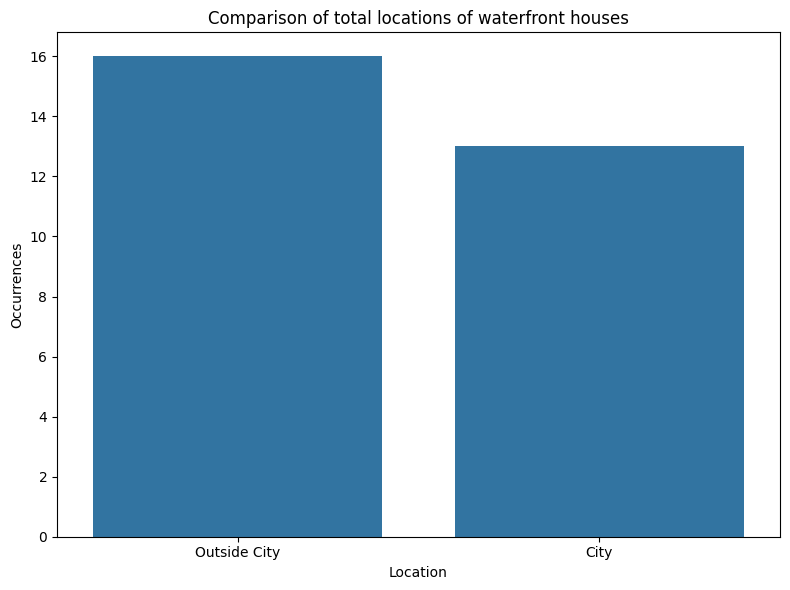

In [68]:
# Create bar countplot
fig_location = plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_first_selection_sort,
    x='location_type'#,
    #palette='Set2'
)

plt.xlabel("Location")
plt.ylabel("Occurrences")
plt.title("Comparison of total locations of waterfront houses")
plt.tight_layout()
plt.show()


In [36]:
#save the image
fig_location.savefig("data/Comparison_waterfront_location.svg", format='svg', bbox_inches='tight', facecolor='white')


This hypothesis holds true although it is quite evenly matched. I wouldn't say from this data that there is a clear trend noticeable. But for this data the total amount of waterfront properties is higher outside the city.

## Let's find a recommendation for the buyer

In conclusion if we go through the list from top to bottom we can recommend 29 houses to our buyer in that order. We could still remove the 2 houses with missing information (nan), but I think for the criteria of our buyer this doesn't matter so much (as she is not interested in these details primarily and we are not preparing the data for AI). The more exciting question would be if she is interested in a house outside or inside the city as the first 3 suggestions are outside the city.

Let's do another general data check with the remaining data.

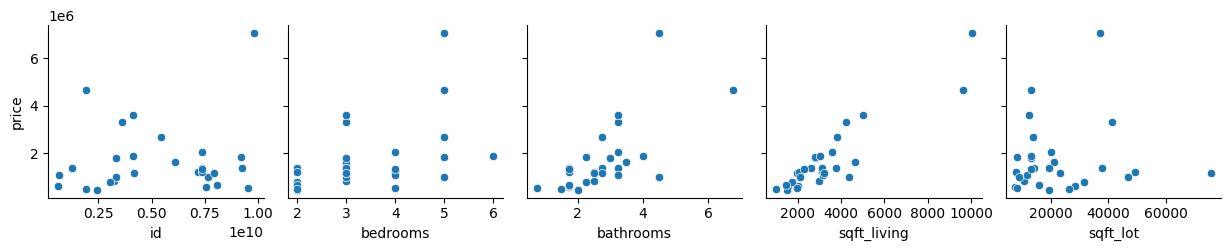

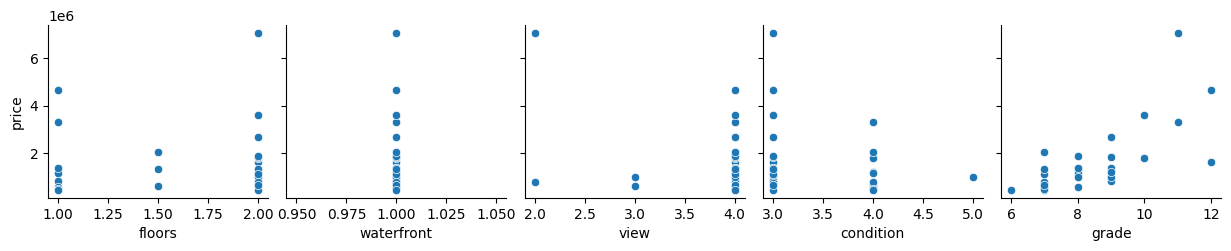

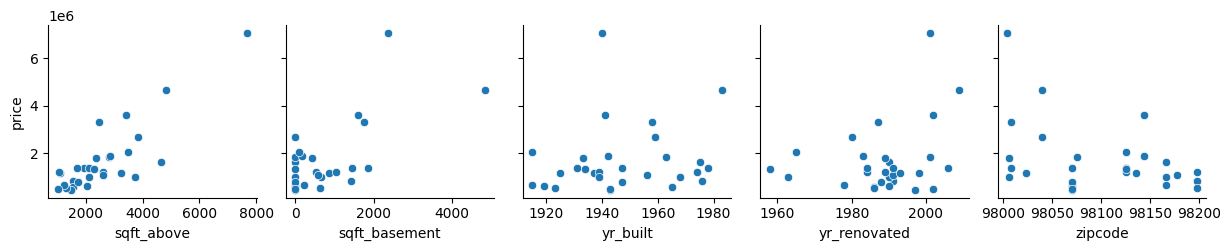

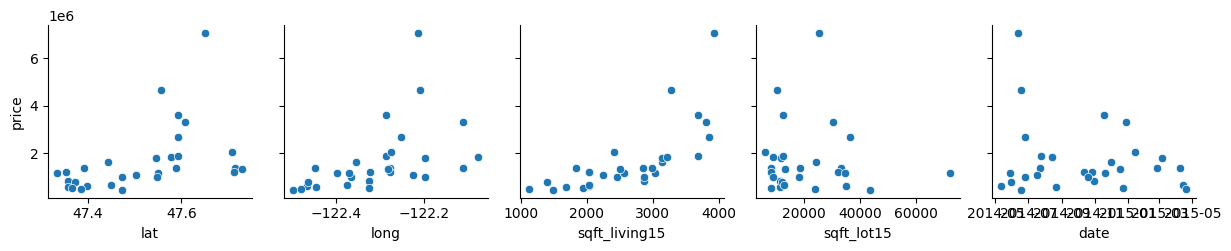

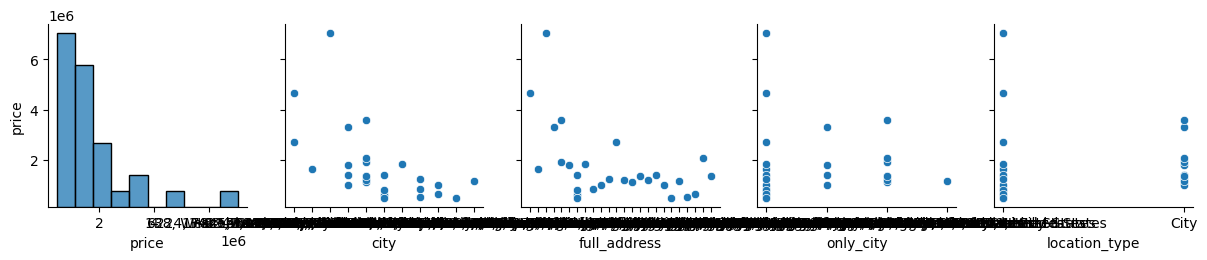

In [157]:
#for sales let's checkout the correlations of our list
#check correlations to prices
for i in range(0, len(df_first_selection_sort.columns), 5):
    sns.pairplot(data=df_first_selection_sort,
                x_vars=df_first_selection_sort.columns[i:i+5],
                y_vars=['price'])

In [158]:
#print as pdf
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("data/remaining_variables_plot.pdf") as pdf:
    for i in range(0, len(df_king_county_imp.columns), 5):
        cols = df_king_county_imp.columns[i:i+5]
        pair = sns.pairplot(df_king_county_imp, x_vars=cols, y_vars=['price'])
        pdf.savefig(pair.figure, bbox_inches='tight')
        plt.close(pair.figure)

The trends are still there, that prices get higher the more bathrooms or sqft_living etc. Although less visible because of fewer data and maybe not as prominent with waterfront houses.

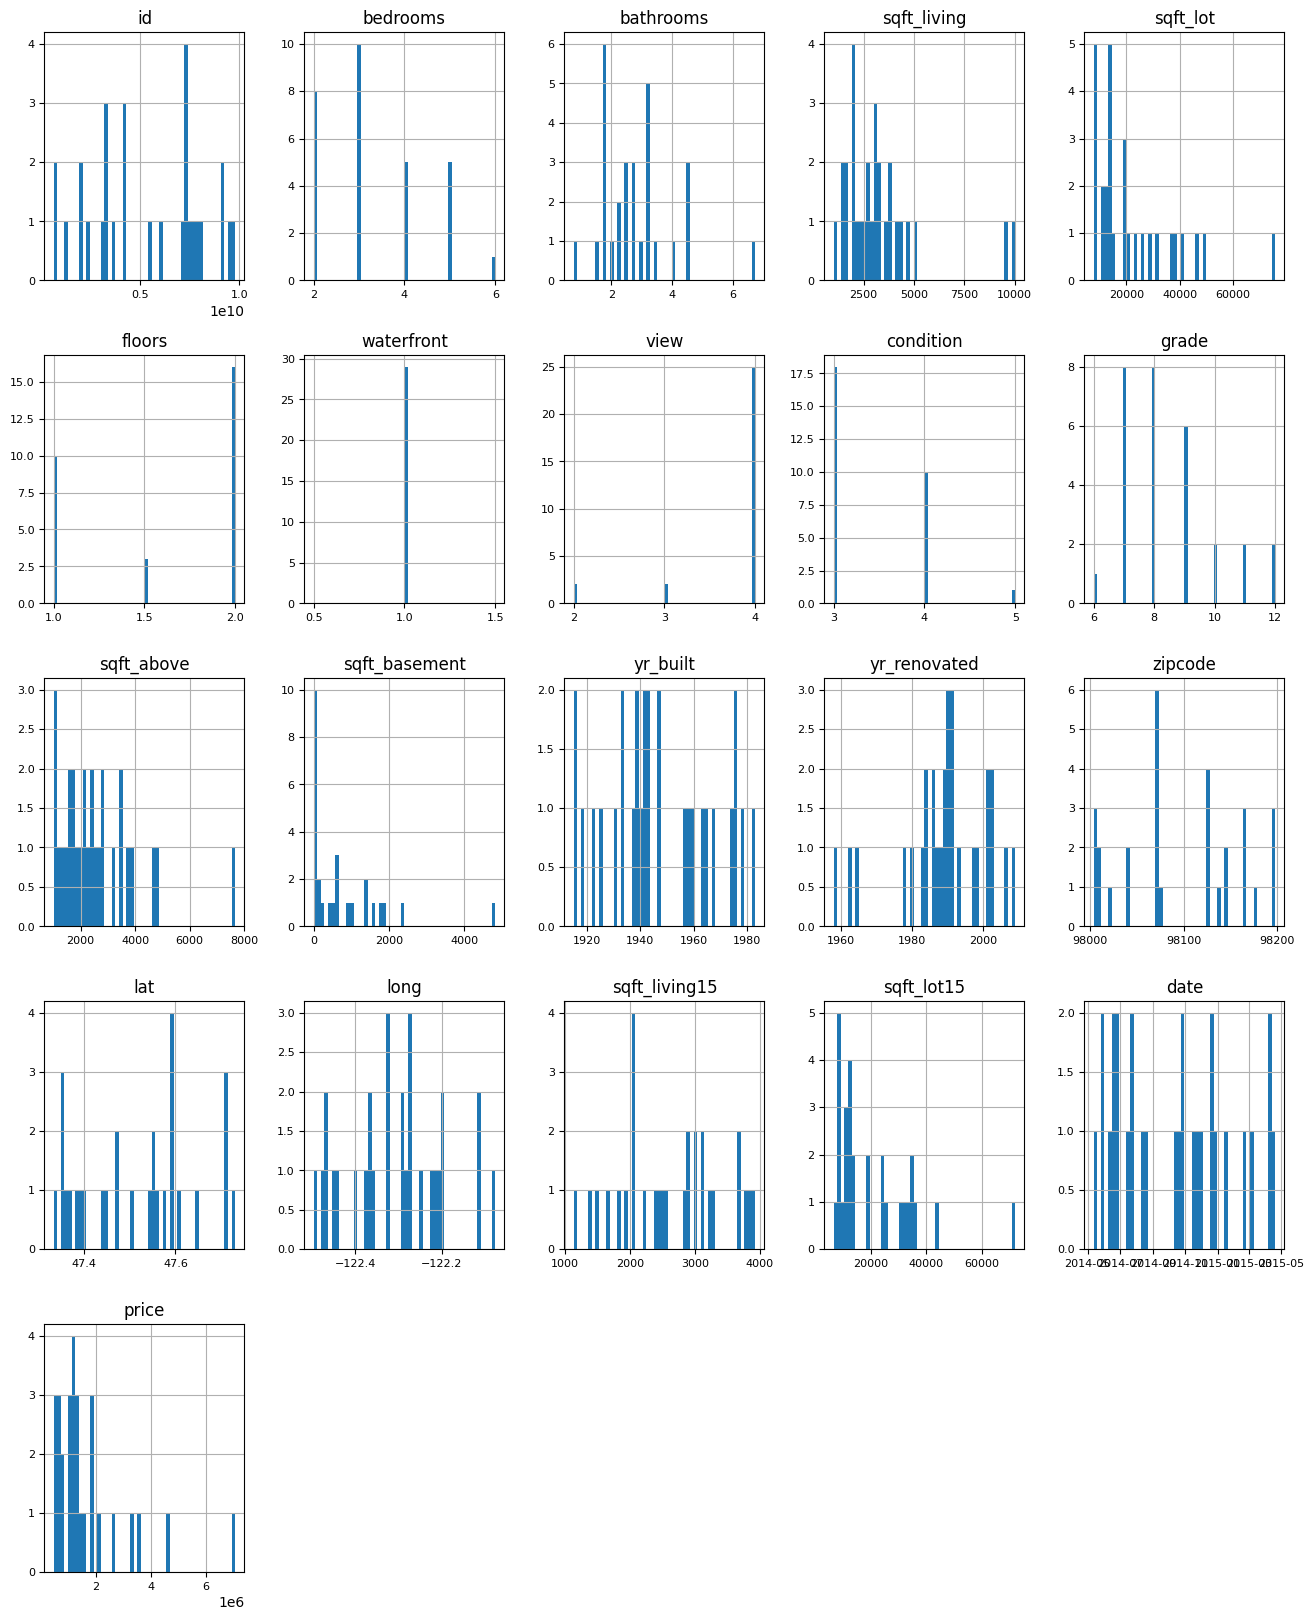

In [159]:
#check histograms of all values
df_first_selection_sort.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations
#save the image
plt.gcf().savefig("data/histograms_offerlist.svg", format='svg', bbox_inches='tight', facecolor='white')

Histograms show no new insight, but confirm for the waterfront that the selection process worked.

Some of the trends from before still hold true. In general with increase in sqft prices increase.

#### Let's refine the presentation of the maps

In [ ]:
#show the first 6 locations, blue locations in true cities and red locations outside of cities, also adds address when clicked as popup 

# Take the first 6 rows
df_map = df_first_selection_sort.head(6)

# Calculate center for the map (mean of the coordinates)
map_center = [df_map['lat'].mean(), df_map['long'].mean()]

# Create a folium map
m2 = folium.Map(location=map_center, zoom_start=10)

# Add markers
for _, row in df_map.iterrows():
    # Choose color based on only_city column
    color = 'blue' if row['only_city'] != 'Outside City' else 'red'
    
    # Popup text: city and full address
    popup_text = f"City: {row['city']}<br>Address: {row['full_address']}"
    
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=popup_text,
        icon=folium.Icon(color=color)
    ).add_to(m2)

# Save the map 
m2.save('data/locations_map6.html')







In [ ]:
#adds legend to the 6 locations map

# Take the first 6 rows
df_map = df_first_selection_sort.head(6)

# Center the map
map_center = [df_map['lat'].mean(), df_map['long'].mean()]
m2 = folium.Map(location=map_center, zoom_start=10)

# Add markers
for _, row in df_map.iterrows():
    color = 'blue' if row['only_city'] != 'Outside City' else 'red'
    popup_text = f"City: {row['city']}<br>Address: {row['full_address']}"
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=popup_text,
        icon=folium.Icon(color=color)
    ).add_to(m2)

# Add a legend
template = """
{% macro html(this, kwargs) %}

<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 180px; height: 90px; 
    z-index:9999; font-size:14px;
    background-color:white;
    border:2px solid grey;
    border-radius:5px;
    padding: 10px;
    ">
    <b>Legend</b><br>
    <i class="fa fa-map-marker fa-2x" style="color:blue"></i>&nbsp; City<br>
    <i class="fa fa-map-marker fa-2x" style="color:red"></i>&nbsp; Outside City
</div>

{% endmacro %}
"""

macro = MacroElement()
macro._template = Template(template)
m2.get_root().add_child(macro)

# Display the map
m2.save('data/locations_map6.html')


In [ ]:
#all with data clustering and red and blue dots if outside and inside cities

# Center map at mean coordinates of all points
map_center = [df_first_selection_sort['lat'].mean(), df_first_selection_sort['long'].mean()]
m3 = folium.Map(location=map_center, zoom_start=10)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m3)

# Add all markers
for _, row in df_first_selection_sort.iterrows():
    color = 'blue' if row['only_city'] != 'Outside City' else 'red'
    popup_text = f"City: {row['city']}<br>Address: {row['full_address']}"
    
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=popup_text,
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Add a legend
template = """
{% macro html(this, kwargs) %}

<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 180px; height: 90px; 
    z-index:9999; font-size:14px;
    background-color:white;
    border:2px solid grey;
    border-radius:5px;
    padding: 10px;
    ">
    <b>Legend</b><br>
    <i class="fa fa-map-marker fa-2x" style="color:blue"></i>&nbsp; City<br>
    <i class="fa fa-map-marker fa-2x" style="color:red"></i>&nbsp; Outside City
</div>

{% endmacro %}
"""

macro = MacroElement()
macro._template = Template(template)
m3.get_root().add_child(macro)

# Display map
m3.save('data/locations_map_color.html')


In [ ]:
#no data clustering

# Center map at mean coordinates of all points
map_center = [df_first_selection_sort['lat'].mean(), df_first_selection_sort['long'].mean()]
m4 = folium.Map(location=map_center, zoom_start=10)

# Add all markers individually
for _, row in df_first_selection_sort.iterrows():
    color = 'blue' if row['only_city'] != 'Outside City' else 'red'
    popup_text = f"City: {row['city']}<br>Address: {row['full_address']}"
    
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=popup_text,
        icon=folium.Icon(color=color)
    ).add_to(m4)

# Add a legend
template = """
{% macro html(this, kwargs) %}

<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 180px; height: 90px; 
    z-index:9999; font-size:14px;
    background-color:white;
    border:2px solid grey;
    border-radius:5px;
    padding: 10px;
    ">
    <b>Legend</b><br>
    <i class="fa fa-map-marker fa-2x" style="color:blue"></i>&nbsp; City<br>
    <i class="fa fa-map-marker fa-2x" style="color:red"></i>&nbsp; Outside City
</div>

{% endmacro %}
"""

macro = MacroElement()
macro._template = Template(template)
m4.get_root().add_child(macro)

# Display map
m4.save('data/locations_map_color_all.html')
